# Menganalisis Keterkaitan Ekonomi, Akses Kesehatan, dan Infrastruktur terhadap Kesehatan Masyarakat di Jawa Barat menggunakan Exploratory Data Analysis (EDA)

# Kelompok 8
##### 1. Hasbi Haqqul Fikri (2309245)
##### 2. Naeya Adeani Putri (2304017)
##### 3. Ririn Marchelina (2303662)
##### 4. Muhammad Ichsan Khairullah (2306924)
##### 5. Ismail Fatih Raihan (2307840)

# Pendahuluan

Kesehatan masyarakat di Jawa Barat dipengaruhi oleh banyak faktor, salah satunya kondisi ekonomi, akses terhadap layanan kesehatan, dan infrastruktur. Ketiga faktor ini berperan penting dalam menentukan kualitas hidup masyarakat. Melalui tugas ini, kami ingin menganalisis bagaimana keterkaitan faktor-faktor tersebut terhadap kesehatan masyarakat di Jawa Barat.

Untuk itu, kami akan menggunakan Exploratory Data Analysis (EDA) sebagai metode utama. EDA memungkinkan kita melihat pola dan hubungan di antara data, sehingga kita bisa memahami lebih dalam tentang pengaruh ekonomi, akses kesehatan, dan infrastruktur terhadap kesehatan masyarakat. Dengan hasil ini, kami berharap dapat memberikan wawasan yang bermanfaat bagi upaya peningkatan kualitas hidup di Jawa Barat.

# Rumusan Masalah



1. Bagaimana keterkaitan antara tingkat kemiskinan dengan indeks kesehatan di Jawa Barat? Apakah kondisi ekonomi yang lebih rendah berkorelasi dengan kesehatan yang lebih buruk, atau sebaliknya?

2. Apakah akses layanan kesehatan sudah proporsional dengan jumlah penduduk di Jawa Barat? Bagaimana distribusi fasilitas kesehatan dibandingkan dengan kepadatan penduduk di berbagai daerah, dan apakah akses tersebut sudah memadai?

3. Bagaimana hubungan antara tingkat penghasilan masyarakat dengan kepesertaan dalam program BPJS? Apakah masyarakat dengan penghasilan lebih rendah lebih rentan tidak terdaftar di BPJS atau justru sebaliknya?

4. Sejauh mana tingkat produksi sampah berhubungan dengan prevalensi penyakit di masyarakat? Apakah daerah dengan tingkat pengelolaan sampah yang buruk memiliki tingkat penyakit yang lebih tinggi?











In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries
##### 1. %matplotlib inline: Menampilkan grafik Matplotlib secara langsung di Jupyter Notebook.
##### 2. NumPy: Library untuk manipulasi array dan operasi matematis yang efisien.
##### 3. Pandas: Library untuk manipulasi dan analisis data dengan struktur DataFrame dan Series.
##### 4. Matplotlib: Library plotting 2D untuk membuat berbagai jenis grafik.
##### 5. Seaborn: Library visualisasi data yang berbasis Matplotlib, dengan antarmuka yang lebih menarik dan informatif.


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Load Data Set

In [ ]:
# membaca data dari tabel untuk disimpan didalam variabel
df_malaria = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dinkes-od_18554_jml_kasus_penyakit_malaria__kabupatenkota_v1_data.csv")
df_dbd = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dinkes-od_18509_jml_kasus_penyakit_demam_berdarah_dengue_dbd__kabu_v1_data.csv")
df_diare = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dinkes-od_18553_jml_kasus_penyakit_diare__kabupatenkota_v1_data.csv")
df_penduduk_miskin = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/bps-od_17058_persentase_penduduk_miskin__kabupatenkota_v2_data.csv")
df_indeks_kesehatan = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/bps-od_17517_indeks_kesehatan_berdasarkan_kabupatenkota_data.csv")
df_tenaga_kesehatan = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dinkes-od_17171_jml_tenaga_kesehatan_di_rumah_sakit__kategori_jk_v1_data.csv")
df_rumah_sakit = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dinkes-od_17409_daftar_rumah_sakit_berdasarkan_jenis_dan_kelas_v1_data.csv")
df_apotek = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dpmdes-idm_sedia_apotek_terdekat_dari_desa__sts_kbrdn_data.csv")
df_tempat_sampah = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dpmdes-idm_sedia_tempat_pembuangan_sampah_tps__des_kel_data.csv")
df_penghasilan = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dpmdes-idm_smbr_penghasilan_utama_penduduk_desa__des_kel_data.csv")
df_manfaat_bpjs = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dpmdes-idm_sts_warga_desa_manfaat_pelayanan_bpjs_kshtn_jkn_kis__desa_k_data.csv")

# Data Exploration

In [ ]:
# melihat informasi tabel dari dataframe malaria
df_malaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [ ]:
# menghapus kolom yang tidak diperlukan
df_malaria = df_malaria.drop(columns=['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [ ]:
df_malaria.head()

,nama_kabupaten_kota,jumlah_kasus,tahun
0,KABUPATEN BOGOR,0,2016
1,KABUPATEN SUKABUMI,66,2016
2,KABUPATEN CIANJUR,0,2016
3,KABUPATEN BANDUNG,1,2016
4,KABUPATEN GARUT,5,2016


In [ ]:
# melihat informasi tabel dari dataframe dbd
df_dbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [ ]:
# menghapus kolom yang tidak diperlukan
df_dbd = df_dbd.drop(columns=['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [ ]:
# menampilkan 5 baris pertama dataframe dbd
df_dbd.head()

,nama_kabupaten_kota,jumlah_kasus,tahun
0,KABUPATEN BOGOR,3477,2016
1,KABUPATEN SUKABUMI,854,2016
2,KABUPATEN CIANJUR,799,2016
3,KABUPATEN BANDUNG,3466,2016
4,KABUPATEN GARUT,561,2016


In [ ]:
# melihat informasi tabel dari dataframe diare
df_diare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [ ]:
# menghapus kolom yang tidak diperlukan
df_diare = df_diare.drop(columns=['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [ ]:
# menampilkan 5 baris pertama dataframe diare
df_diare.head()

,nama_kabupaten_kota,jumlah_kasus,tahun
0,KABUPATEN BOGOR,159405,2016
1,KABUPATEN SUKABUMI,37369,2016
2,KABUPATEN CIANJUR,41709,2016
3,KABUPATEN BANDUNG,90337,2016
4,KABUPATEN GARUT,96111,2016


In [ ]:
# melihat informasi tabel dari dataframe penduduk miskin
df_penduduk_miskin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          405 non-null    int64  
 1   kode_provinsi               405 non-null    int64  
 2   nama_provinsi               405 non-null    object 
 3   kode_kabupaten_kota         405 non-null    int64  
 4   nama_kabupaten_kota         405 non-null    object 
 5   persentase_penduduk_miskin  405 non-null    float64
 6   satuan                      405 non-null    object 
 7   tahun                       405 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 25.4+ KB


In [ ]:
# menghapus kolom yang tidak diperlukan
df_penduduk_miskin = df_penduduk_miskin.drop(columns=['id', 'nama_provinsi','kode_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [ ]:
# menampilkan 5 baris pertama dataframe penyakit
df_penduduk_miskin.head(1000)

,nama_kabupaten_kota,persentase_penduduk_miskin,tahun
0,KABUPATEN BOGOR,9.97,2010
1,KABUPATEN SUKABUMI,10.65,2010
2,KABUPATEN CIANJUR,14.32,2010
3,KABUPATEN BANDUNG,9.29,2010
4,KABUPATEN GARUT,13.94,2010
...,...,...,...
400,KOTA BEKASI,4.01,2024
401,KOTA DEPOK,2.34,2024
402,KOTA CIMAHI,4.39,2024
403,KOTA TASIKMALAYA,11.10,2024


In [ ]:
# melihat informasi tabel dari dataframe indeks kesehatan
df_indeks_kesehatan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   351 non-null    int64  
 1   kode_provinsi        351 non-null    int64  
 2   nama_provinsi        351 non-null    object 
 3   kode_kabupaten_kota  351 non-null    int64  
 4   nama_kabupaten_kota  351 non-null    object 
 5   indeks_kesehatan     351 non-null    float64
 6   satuan               351 non-null    object 
 7   tahun                351 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 22.1+ KB


In [ ]:
# menghapus kolom yang tidak diperlukan
df_indeks_kesehatan = df_indeks_kesehatan.drop(columns=['id', 'kode_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [ ]:
# menampilkan 5 baris pertama dataframe kesehatan
df_indeks_kesehatan.head(5)

,nama_provinsi,nama_kabupaten_kota,indeks_kesehatan,tahun
0,JAWA BARAT,KABUPATEN BOGOR,77.43,2010
1,JAWA BARAT,KABUPATEN SUKABUMI,76.10,2010
2,JAWA BARAT,KABUPATEN CIANJUR,75.02,2010
3,JAWA BARAT,KABUPATEN BANDUNG,81.44,2010
4,JAWA BARAT,KABUPATEN GARUT,77.44,2010


In [ ]:
# melihat informasi tabel dari dataframe tenaga kesehatan
df_tenaga_kesehatan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1296 non-null   int64 
 1   kode_provinsi        1296 non-null   int64 
 2   nama_provinsi        1296 non-null   object
 3   kode_kabupaten_kota  1296 non-null   int64 
 4   nama_kabupaten_kota  1296 non-null   object
 5   kategori_nakes_rs    1296 non-null   object
 6   jenis_kelamin        1296 non-null   object
 7   jumlah_nakes_rs      1296 non-null   int64 
 8   satuan               1296 non-null   object
 9   tahun                1296 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 101.4+ KB


In [ ]:
# menghapus kolom yang tidak diperlukan
df_tenaga_kesehatan = df_tenaga_kesehatan.drop(columns=['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [ ]:
# menampilkan 5 baris pertama dataframe tenaga kesehatan
df_tenaga_kesehatan.head(5)

,nama_kabupaten_kota,kategori_nakes_rs,jenis_kelamin,jumlah_nakes_rs,tahun
0,KABUPATEN BOGOR,DOKTER GIGI,LAKI-LAKI,4,2018
1,KABUPATEN BOGOR,DOKTER GIGI,PEREMPUAN,13,2018
2,KABUPATEN BOGOR,DOKTER GIGI SPESIALIS,LAKI-LAKI,5,2018
3,KABUPATEN BOGOR,DOKTER GIGI SPESIALIS,PEREMPUAN,10,2018
4,KABUPATEN BOGOR,DOKTER SPESIALIS,LAKI-LAKI,142,2018


In [ ]:
# melihat informasi tabel dari dataframe rumah sakit
df_rumah_sakit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1917 non-null   int64 
 1   kode_provinsi        1917 non-null   int64 
 2   nama_provinsi        1917 non-null   object
 3   kode_kabupaten_kota  1917 non-null   int64 
 4   nama_kabupaten_kota  1917 non-null   object
 5   nama_rumah_sakit     1917 non-null   object
 6   jenis_rumah_sakit    1917 non-null   object
 7   kelas_rumah_sakit    1917 non-null   object
 8   tahun                1917 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 134.9+ KB


In [ ]:
# menghapus kolom yang tidak diperlukan
df_rumah_sakit = df_rumah_sakit.drop(columns=['id', 'kode_provinsi', 'kode_kabupaten_kota', 'kelas_rumah_sakit'])

In [ ]:
# menampilkan 5 baris pertama dataframe rumah sakit
df_rumah_sakit.head(5)

,nama_provinsi,nama_kabupaten_kota,nama_rumah_sakit,jenis_rumah_sakit,tahun
0,JAWA BARAT,KABUPATEN BOGOR,RS PARU DR. M. GOENAWAN PARTOWIDIGDO,RUMAH SAKIT KHUSUS PARU,2019
1,JAWA BARAT,KABUPATEN BOGOR,RS UMUM DAERAH CIBINONG,RUMAH SAKIT UMUM,2019
2,JAWA BARAT,KABUPATEN BOGOR,RS UMUM DAERAH CIAWI,RUMAH SAKIT UMUM,2019
3,JAWA BARAT,KABUPATEN BOGOR,RS UMUM BINA HUSADA,RUMAH SAKIT UMUM,2019
4,JAWA BARAT,KABUPATEN BOGOR,RS IBU DAN ANAK CITRA INSANI,RUMAH SAKIT IBU DAN ANAK,2019


In [ ]:
# melihat informasi tabel dari dataframe apotek
df_apotek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   kode_provinsi                   15936 non-null  float64
 1   nama_provinsi                   15936 non-null  object 
 2   bps_kode_kabupaten_kota         15936 non-null  float64
 3   bps_nama_kabupaten_kota         15936 non-null  object 
 4   bps_kode_kecamatan              15936 non-null  float64
 5   bps_nama_kecamatan              15936 non-null  object 
 6   bps_kode_desa_kelurahan         15936 non-null  float64
 7   bps_nama_desa_kelurahan         15936 non-null  object 
 8   kemendagri_kode_kecamatan       15936 non-null  object 
 9   kemendagri_nama_kecamatan       15936 non-null  object 
 10  kemendagri_kode_desa_kelurahan  15936 non-null  object 
 11  kemendagri_nama_desa_kelurahan  15936 non-null  object 
 12  ketersediaan_apotek             

In [ ]:
# menampilkan 5 baris pertama dataframe apotek
df_apotek.head(5)

,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,ketersediaan_apotek,tahun,id
0,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,WANAHERANG,32.01.02,GUNUNG PUTRI,32.01.02.2001,WANAHERANG,ADA,2019.0,1
1,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,BOJONG KULUR,32.01.02,GUNUNG PUTRI,32.01.02.2002,BOJONG KULUR,ADA,2019.0,2
2,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,CIANGSANA,32.01.02,GUNUNG PUTRI,32.01.02.2003,CIANGSANA,ADA,2019.0,3
3,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,GUNUNG PUTRI,32.01.02,GUNUNG PUTRI,32.01.02.2004,GUNUNG PUTRI,ADA,2019.0,4
4,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,BOJONG NANGKA,32.01.02,GUNUNG PUTRI,32.01.02.2005,BOJONG NANGKA,ADA,2019.0,5


In [ ]:
# menghapus kolom yang tidak diperlukan
df_apotek = df_apotek.drop(columns=['bps_kode_kabupaten_kota', 'kode_provinsi', 'nama_provinsi', 'bps_kode_kecamatan', 'bps_nama_kecamatan', 'kemendagri_nama_desa_kelurahan', 'bps_kode_desa_kelurahan','kemendagri_kode_kecamatan', 'kemendagri_kode_desa_kelurahan', 'id', 'kemendagri_nama_kecamatan' ])

In [ ]:
# menampilkan 5 baris pertama dataframe apotek, 2 KALI ??????? diatas udh
df_apotek.head(5)

,bps_nama_kabupaten_kota,bps_nama_desa_kelurahan,ketersediaan_apotek,tahun
0,KABUPATEN BOGOR,WANAHERANG,ADA,2019.0
1,KABUPATEN BOGOR,BOJONG KULUR,ADA,2019.0
2,KABUPATEN BOGOR,CIANGSANA,ADA,2019.0
3,KABUPATEN BOGOR,GUNUNG PUTRI,ADA,2019.0
4,KABUPATEN BOGOR,BOJONG NANGKA,ADA,2019.0


In [ ]:
# melihat informasi tabel dari dataframe tempat sampah
df_tempat_sampah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26559 entries, 0 to 26558
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   kode_provinsi                          26559 non-null  float64
 1   nama_provinsi                          26559 non-null  object 
 2   bps_kode_kabupaten_kota                26559 non-null  float64
 3   bps_nama_kabupaten_kota                26559 non-null  object 
 4   bps_kode_kecamatan                     26559 non-null  float64
 5   bps_nama_kecamatan                     26559 non-null  object 
 6   bps_kode_desa_kelurahan                26559 non-null  float64
 7   bps_nama_desa_kelurahan                26559 non-null  object 
 8   kemendagri_kode_kecamatan              26559 non-null  object 
 9   kemendagri_nama_kecamatan              26559 non-null  object 
 10  kemendagri_kode_desa_kelurahan         26559 non-null  object 
 11  ke

In [ ]:
# menghapus kolom yang tidak diperlukan
df_tempat_sampah = df_tempat_sampah.drop(columns=['bps_kode_kabupaten_kota', 'kode_provinsi', 'nama_provinsi', 'bps_kode_kecamatan', 'bps_nama_kecamatan', 'kemendagri_nama_desa_kelurahan', 'bps_kode_desa_kelurahan','kemendagri_kode_kecamatan', 'kemendagri_kode_desa_kelurahan', 'id', 'kemendagri_nama_kecamatan' ])

In [ ]:
# prompt: how to change df_tempat_sampah attribute called bps_nama_kabupaten_kota into nama_kabupaten_kota

df_tempat_sampah = df_tempat_sampah.rename(columns={'bps_nama_kabupaten_kota': 'nama_kabupaten_kota'})


In [ ]:
# menampilkan 5 baris pertama dataframe tempat sampah
df_tempat_sampah.head(5)

,nama_kabupaten_kota,bps_nama_desa_kelurahan,ketersediaan_tempat_pembuangan_sampah,tahun
0,KABUPATEN BOGOR,WANAHERANG,TIDAK ADA,2019.0
1,KABUPATEN BOGOR,BOJONG KULUR,ADA,2019.0
2,KABUPATEN BOGOR,CIANGSANA,TIDAK ADA,2019.0
3,KABUPATEN BOGOR,GUNUNG PUTRI,ADA,2019.0
4,KABUPATEN BOGOR,BOJONG NANGKA,TIDAK ADA,2019.0


In [ ]:
# melihat informasi tabel dari dataframe penghasilan
df_penghasilan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ï»¿kode_provinsi                        15936 non-null  float64
 1   nama_provinsi                           15936 non-null  object 
 2   bps_kode_kabupaten_kota                 15936 non-null  float64
 3   bps_nama_kabupaten_kota                 15936 non-null  object 
 4   bps_kode_kecamatan                      15936 non-null  float64
 5   bps_nama_kecamatan                      15936 non-null  object 
 6   bps_kode_desa_kelurahan                 15936 non-null  float64
 7   bps_nama_desa_kelurahan                 15936 non-null  object 
 8   kemendagri_kode_kecamatan               15936 non-null  object 
 9   kemendagri_nama_kecamatan               15936 non-null  object 
 10  kemendagri_kode_desa_kelurahan          15936 non-null  ob

In [ ]:
# menghapus kolom yang tidak diperlukan
df_penghasilan = df_penghasilan.drop(columns=['bps_kode_kabupaten_kota', 'ï»¿kode_provinsi', 'nama_provinsi', 'bps_kode_kecamatan', 'bps_nama_kecamatan', 'kemendagri_nama_desa_kelurahan', 'bps_kode_desa_kelurahan','kemendagri_kode_kecamatan', 'kemendagri_kode_desa_kelurahan', 'id', 'kemendagri_nama_kecamatan' ])

In [ ]:
# menampilkan 5 baris pertama dataframe penghasilan
df_penghasilan.head(5)

,bps_nama_kabupaten_kota,bps_nama_desa_kelurahan,sumber_penghasilan_utama_penduduk_desa,tahun
0,KABUPATEN BOGOR,WANAHERANG,INDUSTRI,2019.0
1,KABUPATEN BOGOR,BOJONG KULUR,PERDAGANGAN/ TRANSPORTASI/ DAN JASA,2019.0
2,KABUPATEN BOGOR,CIANGSANA,PERDAGANGAN/ TRANSPORTASI/ DAN JASA,2019.0
3,KABUPATEN BOGOR,GUNUNG PUTRI,PERDAGANGAN/ TRANSPORTASI/ DAN JASA,2019.0
4,KABUPATEN BOGOR,BOJONG NANGKA,INDUSTRI,2019.0


In [ ]:
# melihat informasi tabel dari dataframe manfaat bpjs
df_manfaat_bpjs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26559 entries, 0 to 26558
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   kode_provinsi                   26559 non-null  float64
 1   nama_provinsi                   26559 non-null  object 
 2   bps_kode_kabupaten_kota         26559 non-null  float64
 3   bps_nama_kabupaten_kota         26559 non-null  object 
 4   bps_kode_kecamatan              26559 non-null  float64
 5   bps_nama_kecamatan              26559 non-null  object 
 6   bps_kode_desa_kelurahan         26559 non-null  float64
 7   bps_nama_desa_kelurahan         26559 non-null  object 
 8   kemendagri_kode_kecamatan       26559 non-null  object 
 9   kemendagri_nama_kecamatan       26559 non-null  object 
 10  kemendagri_kode_desa_kelurahan  26559 non-null  object 
 11  kemendagri_nama_desa_kelurahan  26559 non-null  object 
 12  status_warga_memanfaatkan_bpjs  

In [ ]:
# menghapus kolom yang tidak diperlukan
df_manfaat_bpjs = df_manfaat_bpjs.drop(columns=['bps_kode_kabupaten_kota', 'kode_provinsi', 'nama_provinsi', 'bps_kode_kecamatan', 'bps_nama_kecamatan', 'kemendagri_nama_desa_kelurahan', 'bps_kode_desa_kelurahan','kemendagri_kode_kecamatan', 'kemendagri_kode_desa_kelurahan', 'id', 'kemendagri_nama_kecamatan' ])

In [ ]:
# menampilkan 5 baris pertama dataframe manfaat bpjs
df_manfaat_bpjs.head(5)

,bps_nama_kabupaten_kota,bps_nama_desa_kelurahan,status_warga_memanfaatkan_bpjs,tahun
0,KABUPATEN BOGOR,WANAHERANG,YA SEBAGIAN KECIL,2019.0
1,KABUPATEN BOGOR,BOJONG KULUR,YA SEBAGIAN BESAR,2019.0
2,KABUPATEN BOGOR,CIANGSANA,YA SEBAGIAN BESAR,2019.0
3,KABUPATEN BOGOR,GUNUNG PUTRI,YA SEBAGIAN BESAR,2019.0
4,KABUPATEN BOGOR,BOJONG NANGKA,YA SEBAGIAN BESAR,2019.0


In [ ]:
# Gabungkan dataframe df_penduduk_miskin dan df_indeks_kesehatan
df1 = pd.merge(df_penduduk_miskin, df_indeks_kesehatan, on='nama_kabupaten_kota')

# Filter data untuk tahun 2019
df1 = df1[df1['tahun_x'] == 2019]

# Kelompokkan data dan hitung rata-rata
df1 = df1.groupby('nama_kabupaten_kota').agg({'persentase_penduduk_miskin': 'mean', 'indeks_kesehatan': 'mean'}).reset_index()

In [ ]:
# menampilkan 5 baris pertama dataframe campuran 1
df1.head(5)

,nama_kabupaten_kota,persentase_penduduk_miskin,indeks_kesehatan
0,KABUPATEN BANDUNG,5.94,81.892308
1,KABUPATEN BANDUNG BARAT,9.38,79.883077
2,KABUPATEN BEKASI,4.01,82.075385
3,KABUPATEN BOGOR,6.66,78.116923
4,KABUPATEN CIAMIS,6.65,78.420769


In [ ]:
# Gabungkan dataframe df_penghasilan dan df_manfaat_bpjs berdasarkan nama kabupaten/kota
df3 = pd.merge(df_penghasilan, df_manfaat_bpjs, on=['bps_nama_kabupaten_kota', 'bps_nama_desa_kelurahan', 'tahun'])

# Filter data untuk tahun 2019
df3 = df3[df3['tahun'] == 2019]

In [ ]:
df3.head(5)

,bps_nama_kabupaten_kota,bps_nama_desa_kelurahan,sumber_penghasilan_utama_penduduk_desa,tahun,status_warga_memanfaatkan_bpjs
0,KABUPATEN BOGOR,WANAHERANG,INDUSTRI,2019.0,YA SEBAGIAN KECIL
1,KABUPATEN BOGOR,BOJONG KULUR,PERDAGANGAN/ TRANSPORTASI/ DAN JASA,2019.0,YA SEBAGIAN BESAR
2,KABUPATEN BOGOR,CIANGSANA,PERDAGANGAN/ TRANSPORTASI/ DAN JASA,2019.0,YA SEBAGIAN BESAR
3,KABUPATEN BOGOR,GUNUNG PUTRI,PERDAGANGAN/ TRANSPORTASI/ DAN JASA,2019.0,YA SEBAGIAN BESAR
4,KABUPATEN BOGOR,BOJONG NANGKA,INDUSTRI,2019.0,YA SEBAGIAN BESAR


# Analysis & Visualization

## Studi Kasus  : Jumlah Kasus Diare di Jawa Barat (2020-2023)

### Latar Belakang
##### Diare merupakan salah satu penyakit yang umum terjadi dan dapat disebabkan oleh berbagai faktor, termasuk sanitasi yang buruk, kurangnya akses terhadap air bersih, dan kurangnya pengetahuan tentang kebersihan. Penyakit ini sering kali lebih banyak terjadi di daerah dengan tingkat kemiskinan yang tinggi. Dengan demikian, pemantauan jumlah kasus diare sangat penting untuk merencanakan intervensi kesehatan masyarakat yang tepat.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

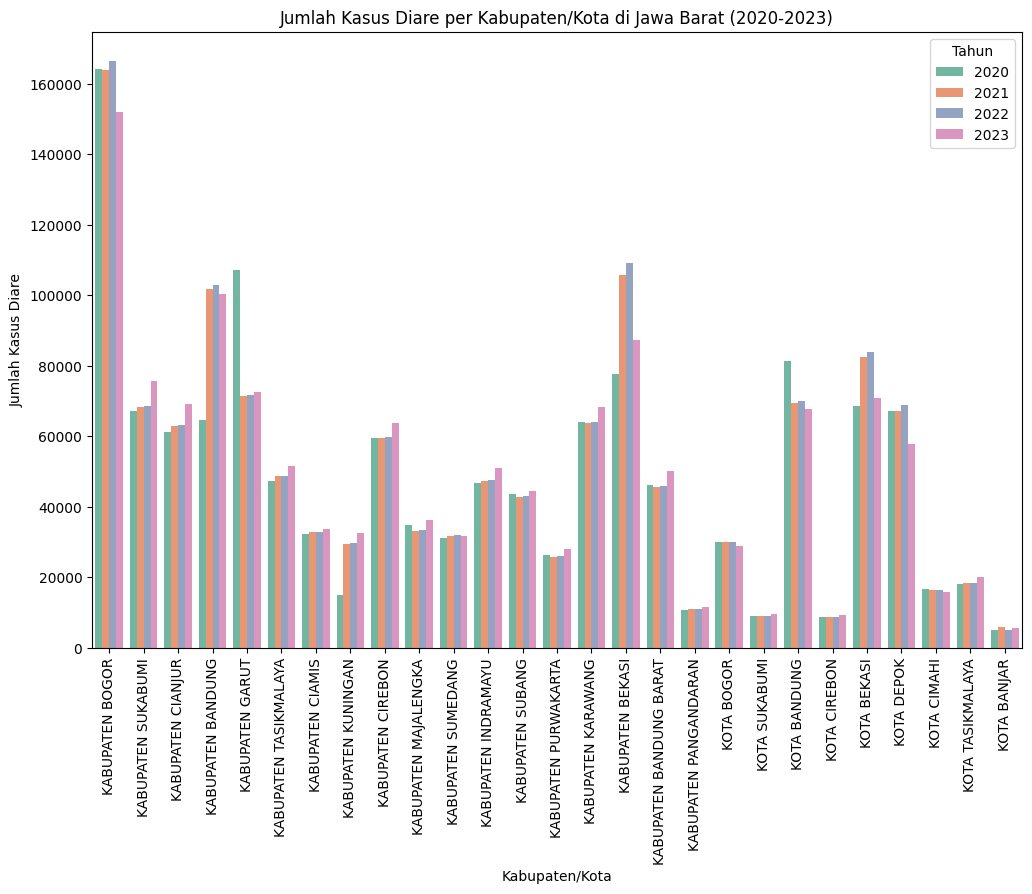

In [ ]:
df_diare_filtered = df_diare[df_diare['tahun'].isin([2020, 2021, 2022, 2023])]

# Plot barplot untuk kasus diare
plt.figure(figsize=(12, 8))

# Bar plot untuk kasus diare dengan hue untuk tahun
sns.barplot(x='nama_kabupaten_kota', y='jumlah_kasus', hue='tahun', data=df_diare_filtered, palette='Set2')

# Rotasi nama kabupaten/kota agar lebih mudah dibaca
plt.xticks(rotation=90)
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Kasus Diare')
plt.title('Jumlah Kasus Diare per Kabupaten/Kota di Jawa Barat (2020-2023)')

# Tampilkan plot
plt.legend(title='Tahun')
plt.show()

### Kesimpulan

mengenai jumlah kasus diare di Jawa Barat (2020-2023) menunjukkan bahwa jumlah kasus bervariasi setiap tahun di setiap kabupaten/kota, dengan daerah yang memiliki sanitasi buruk dan akses terbatas ke air bersih cenderung mengalami lebih banyak kasus diare. Terdapat korelasi antara tingkat kemiskinan dan jumlah kasus diare, di mana daerah miskin menghadapi tantangan lebih besar.

## Studi Kasus: Jumlah Kasus DBD di Jawa Barat (2020-2023)



### Latar Belakang:
###### Demam Berdarah Dengue (DBD) adalah penyakit menular yang disebabkan oleh virus dengue, yang ditularkan melalui gigitan nyamuk Aedes aegypti. Penyakit ini dapat menimbulkan risiko kesehatan yang serius dan sering kali terjadi dalam bentuk wabah, terutama di daerah yang memiliki sanitasi yang buruk dan kepadatan penduduk yang tinggi. Oleh karena itu, pemantauan jumlah kasus DBD penting untuk pengendalian penyakit dan intervensi kesehatan masyarakat.

### Tujuan Analisis:
###### Menganalisis jumlah kasus DBD per kabupaten/kota di Jawa Barat dari tahun 2020 hingga 2023 dengan tujuan untuk:
###### Mengidentifikasi tren jumlah kasus DBD di setiap kabupaten/kota selama periode tersebut.
###### Mengetahui apakah terdapat perbedaan signifikan dalam jumlah kasus DBD dari tahun ke tahun.

### Analisis dan Visualisasi

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

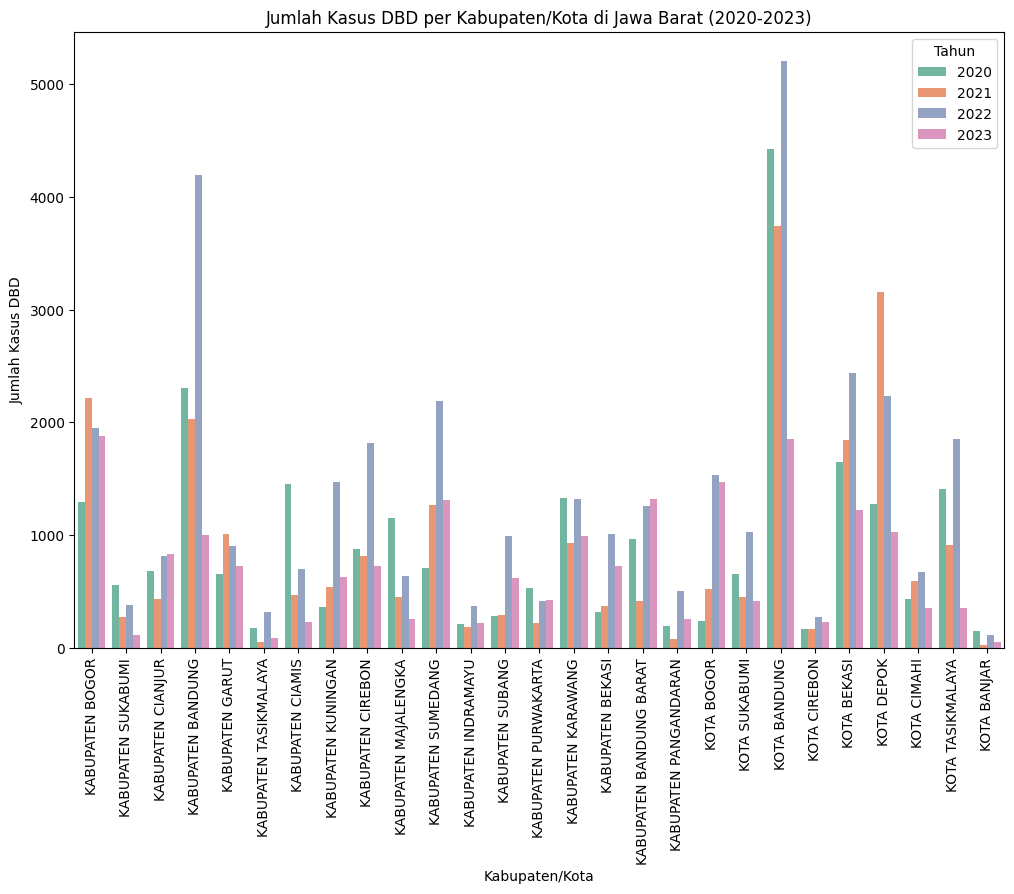

In [ ]:
df_dbd_filtered = df_dbd[df_dbd['tahun'].isin([2020, 2021, 2022, 2023])]

# Plot barplot untuk kasus DBD
plt.figure(figsize=(12, 8))

# Bar plot untuk kasus DBD dengan hue untuk tahun
sns.barplot(x='nama_kabupaten_kota', y='jumlah_kasus', hue='tahun', data=df_dbd_filtered, palette='Set2')

# Rotasi nama kabupaten/kota agar lebih mudah dibaca
plt.xticks(rotation=90)
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Kasus DBD')
plt.title('Jumlah Kasus DBD per Kabupaten/Kota di Jawa Barat (2020-2023)')

# Tampilkan plot
plt.legend(title='Tahun')
plt.show()

#### Kesimpulan
mengenai jumlah kasus DBD di Jawa Barat dari tahun 2020 hingga 2023 menunjukkan adanya variasi dalam jumlah kasus di setiap kabupaten/kota selama periode tersebut, dengan beberapa daerah mengalami lonjakan kasus yang signifikan. Selain itu, analisis perbandingan tahun ke tahun mengindikasikan adanya perbedaan signifikan dalam jumlah kasus, yang menggarisbawahi perlunya intervensi kesehatan masyarakat yang lebih baik dan strategi pencegahan yang efektif untuk mengendalikan penyebaran DBD, terutama di wilayah-wilayah yang rawan.
> Add blockquote



## Studi Kasus: Jumlah Kasus Malaria di Jawa Barat (2020-2023)



### Latar Belakang:
###### Malaria adalah penyakit menular yang disebabkan oleh parasit yang ditularkan melalui gigitan nyamuk Anopheles. Penyakit ini masih menjadi masalah kesehatan masyarakat di banyak daerah, termasuk di Indonesia. Dengan tingkat kemiskinan yang tinggi dan akses terbatas ke layanan kesehatan, masyarakat di daerah tertentu mungkin lebih rentan terhadap malaria. Oleh karena itu, pemantauan jumlah kasus malaria sangat penting untuk perencanaan dan intervensi kesehatan masyarakat yang efektif.

### Tujuan Analisis:
###### Menganalisis jumlah kasus malaria per kabupaten/kota di Jawa Barat dari tahun 2020 hingga 2023 dengan tujuan untuk:
######Mengidentifikasi tren jumlah kasus malaria di setiap kabupaten/kota selama periode tersebut.
######Mengetahui apakah terdapat perbedaan signifikan dalam jumlah kasus malaria dari tahun ke tahun.

### Analisis dan Visualisasi

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

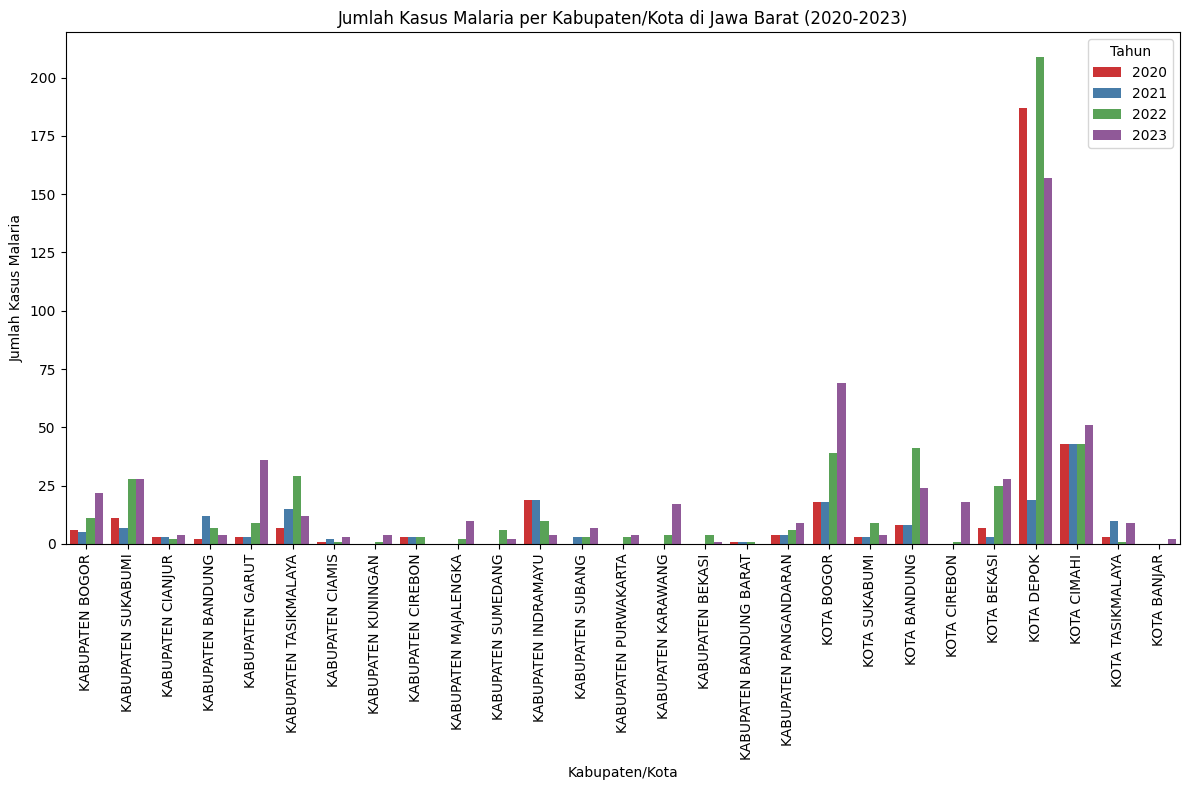

In [ ]:
df_malaria_filtered = df_malaria[df_malaria['tahun'].isin([2020, 2021, 2022, 2023])]

# Plot barplot untuk kasus malaria
plt.figure(figsize=(12, 8))

# Bar plot untuk kasus malaria dengan hue untuk tahun
sns.barplot(x='nama_kabupaten_kota', y='jumlah_kasus', hue='tahun', data=df_malaria_filtered, palette='Set1')

# Rotasi nama kabupaten/kota agar lebih mudah dibaca
plt.xticks(rotation=90)
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Kasus Malaria')
plt.title('Jumlah Kasus Malaria per Kabupaten/Kota di Jawa Barat (2020-2023)')

# Tampilkan plot
plt.legend(title='Tahun')
plt.tight_layout()  # Untuk menghindari label yang terpotong
plt.show()

#### Kesimpulan
mengenai jumlah kasus malaria di Jawa Barat dari tahun 2020 hingga 2023 menunjukkan adanya variasi dalam jumlah kasus malaria di setiap kabupaten/kota selama periode tersebut. Beberapa daerah mengalami peningkatan signifikan dalam jumlah kasus, yang mungkin dipengaruhi oleh faktor-faktor seperti tingkat sanitasi, akses layanan kesehatan, dan kesadaran masyarakat akan pencegahan malaria.

## Studi Kasus: Tren Jumlah Kasus Penyakit di Jawa Barat (2020-2023)


### Latar Belakang:
##### Penyakit menular seperti diare, malaria, dan Demam Berdarah Dengue (DBD) tetap menjadi masalah kesehatan masyarakat di Indonesia, termasuk di provinsi Jawa Barat. Penyakit ini dapat memengaruhi kualitas hidup dan produktivitas masyarakat. Dengan adanya faktor risiko seperti sanitasi yang buruk dan akses terbatas ke layanan kesehatan, pemantauan jumlah kasus penyakit ini sangat penting untuk perencanaan intervensi yang efektif.
### Tujuan Analisis:
##### Menganalisis jumlah kasus diare, malaria, dan DBD per kabupaten/kota di Jawa Barat dari tahun 2020 hingga 2023. Tujuannya adalah untuk:
##### Mengidentifikasi tren jumlah kasus untuk masing-masing penyakit selama periode tersebut.
##### Menganalisis perbandingan jumlah kasus antara ketiga penyakit di berbagai kabupaten/kota.
##### Mengetahui apakah terdapat perbedaan signifikan dalam jumlah kasus dari tahun ke tahun.

<ipython-input-95-3d2c1d799c6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malaria_filtered['penyakit'] = 'Malaria'
<ipython-input-95-3d2c1d799c6e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbd_filtered['penyakit'] = 'DBD'
<ipython-input-95-3d2c1d799c6e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

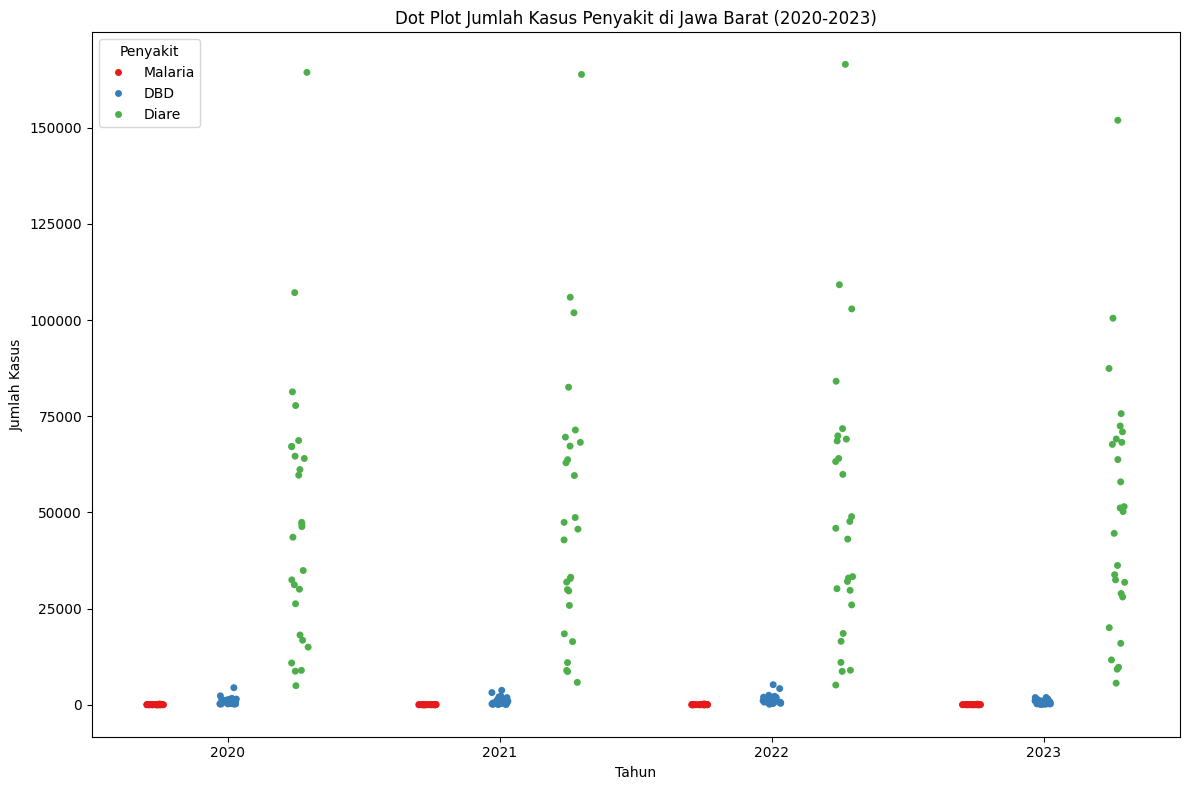

In [ ]:
df_malaria_filtered = df_malaria[df_malaria['tahun'].isin([2020, 2021, 2022, 2023])]
df_dbd_filtered = df_dbd[df_dbd['tahun'].isin([2020, 2021, 2022, 2023])]
df_diare_filtered = df_diare[df_diare['tahun'].isin([2020, 2021, 2022, 2023])]

# Tambahkan kolom penyakit untuk membedakan data
df_malaria_filtered['penyakit'] = 'Malaria'
df_dbd_filtered['penyakit'] = 'DBD'
df_diare_filtered['penyakit'] = 'Diare'

# Gabungkan ketiga dataset
df_combined = pd.concat([df_malaria_filtered[['tahun', 'nama_kabupaten_kota', 'jumlah_kasus', 'penyakit']],
                         df_dbd_filtered[['tahun', 'nama_kabupaten_kota', 'jumlah_kasus', 'penyakit']],
                         df_diare_filtered[['tahun', 'nama_kabupaten_kota', 'jumlah_kasus', 'penyakit']]],
                        ignore_index=True)

# Visualisasi Dot Plot
plt.figure(figsize=(12, 8))
sns.stripplot(data=df_combined, x='tahun', y='jumlah_kasus', hue='penyakit', jitter=True, dodge=True, palette='Set1', marker='o')

# Memberi label dan judul
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.title('Dot Plot Jumlah Kasus Penyakit di Jawa Barat (2020-2023)')
plt.legend(title='Penyakit')

# Tampilkan plot
plt.tight_layout()
plt.show()

#### Kesimpulan
mengenai tren jumlah kasus penyakit di Jawa Barat (2020-2023) menunjukkan bahwa penyakit menular seperti diare, malaria, dan DBD tetap menjadi masalah kesehatan masyarakat yang signifikan di provinsi ini. Visualisasi dot plot mengilustrasikan perbedaan jumlah kasus di berbagai kabupaten/kota, menegaskan pentingnya intervensi kesehatan masyarakat yang lebih terfokus untuk mengendalikan dan mencegah penyebaran penyakit ini.

# Studi Kausus: Tren Jumlah Kasus Diare, DBD, dan Malaria di Jawa Barat

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


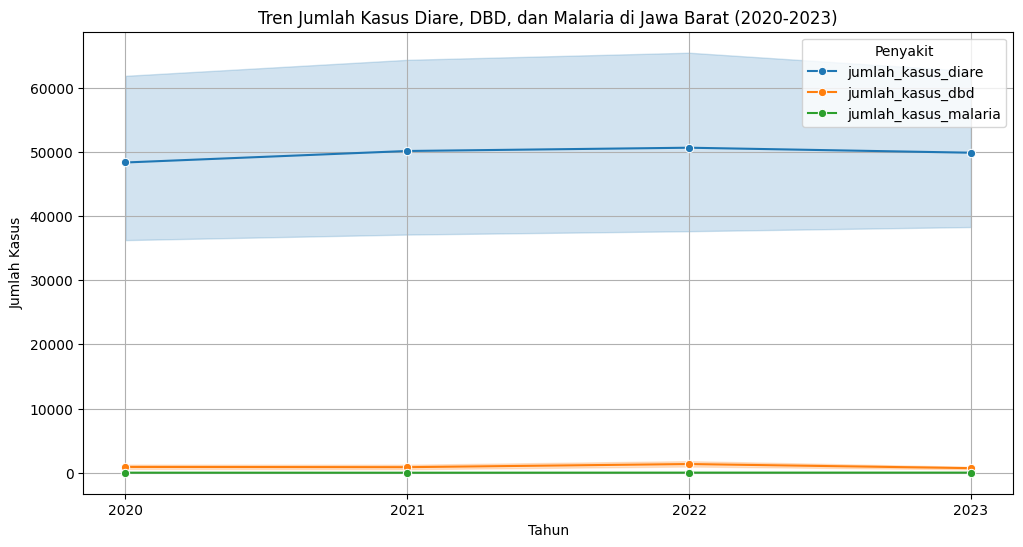

In [ ]:
df_diare_filtered = df_diare[df_diare['tahun'].isin([2020, 2021, 2022, 2023])]
df_dbd_filtered = df_dbd[df_dbd['tahun'].isin([2020, 2021, 2022, 2023])]
df_malaria_filtered = df_malaria[df_malaria['tahun'].isin([2020, 2021, 2022, 2023])]

# Gabungkan data menjadi satu DataFrame
df_combined = pd.DataFrame({
    'tahun': df_diare_filtered['tahun'],
    'jumlah_kasus_diare': df_diare_filtered['jumlah_kasus'],
    'jumlah_kasus_dbd': df_dbd_filtered['jumlah_kasus'],
    'jumlah_kasus_malaria': df_malaria_filtered['jumlah_kasus']
})

# Buat DataFrame dalam format long untuk visualisasi
df_melted = pd.melt(df_combined, id_vars=['tahun'],
                     value_vars=['jumlah_kasus_diare', 'jumlah_kasus_dbd', 'jumlah_kasus_malaria'],
                     var_name='Penyakit', value_name='Jumlah Kasus')

# Plot line plot untuk tren penyakit
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='tahun', y='Jumlah Kasus', hue='Penyakit', marker='o')

# Memberi label dan judul
plt.title('Tren Jumlah Kasus Diare, DBD, dan Malaria di Jawa Barat (2020-2023)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.xticks([2020, 2021, 2022, 2023])  # Jika tahun tidak berurutan

# Tampilkan plot
plt.grid()
plt.legend(title='Penyakit')
plt.show()

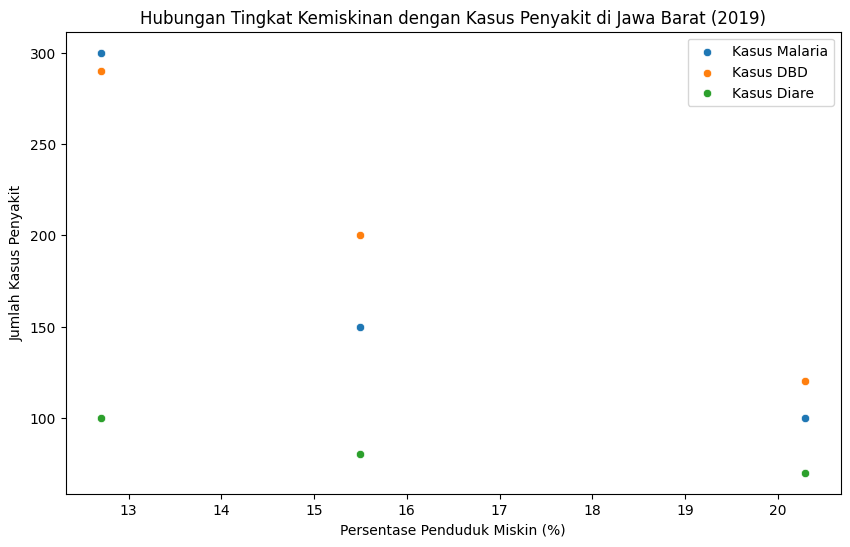

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh data untuk penduduk miskin, malaria, DBD, dan diare
data_penduduk_miskin = {
    'nama_kabupaten_kota': ['Kabupaten 1', 'Kabupaten 2', 'Kabupaten 3'],
    'persentase_penduduk_miskin': [15.5, 20.3, 12.7]
}
df_penduduk_miskin_2019 = pd.DataFrame(data_penduduk_miskin)

data_malaria = {
    'nama_kabupaten_kota': ['Kabupaten 1', 'Kabupaten 2', 'Kabupaten 3'],
    'jumlah_kasus': [150, 100, 300]
}
df_malaria_2019 = pd.DataFrame(data_malaria)

data_dbd = {
    'nama_kabupaten_kota': ['Kabupaten 1', 'Kabupaten 2', 'Kabupaten 3'],
    'jumlah_kasus': [200, 120, 290]
}
df_dbd_2019 = pd.DataFrame(data_dbd)

data_diare = {
    'nama_kabupaten_kota': ['Kabupaten 1', 'Kabupaten 2', 'Kabupaten 3'],
    'jumlah_kasus': [80, 70, 100]
}
df_diare_2019 = pd.DataFrame(data_diare)

# Gabungkan data kemiskinan dan penyakit berdasarkan kabupaten/kota
df_combined = pd.merge(df_penduduk_miskin_2019, df_malaria_2019, on='nama_kabupaten_kota', how='inner', suffixes=('_miskin', '_malaria'))
df_combined = pd.merge(df_combined, df_dbd_2019[['nama_kabupaten_kota', 'jumlah_kasus']], on='nama_kabupaten_kota', how='inner', suffixes=('', '_dbd'))
df_combined = pd.merge(df_combined, df_diare_2019[['nama_kabupaten_kota', 'jumlah_kasus']], on='nama_kabupaten_kota', how='inner', suffixes=('', '_diare'))

# Visualisasi 1: Scatter plot antara tingkat kemiskinan dan jumlah kasus penyakit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='persentase_penduduk_miskin', y='jumlah_kasus', data=df_combined, label='Kasus Malaria')  # Kolom 'jumlah_kasus' untuk malaria
sns.scatterplot(x='persentase_penduduk_miskin', y='jumlah_kasus_dbd', data=df_combined, label='Kasus DBD')  # Kolom untuk DBD
sns.scatterplot(x='persentase_penduduk_miskin', y='jumlah_kasus_diare', data=df_combined, label='Kasus Diare')  # Kolom untuk diare

plt.title('Hubungan Tingkat Kemiskinan dengan Kasus Penyakit di Jawa Barat (2019)')
plt.xlabel('Persentase Penduduk Miskin (%)')
plt.ylabel('Jumlah Kasus Penyakit')
plt.legend()
plt.show()


In [ ]:
# Gabungkan dataframe df_penduduk_miskin dan df_indeks_kesehatan
df6 = pd.merge(df_tempat_sampah, df_diare, on='nama_kabupaten_kota')

# Filter data untuk tahun 2019
df6 = df6[df6['tahun_x'] == 2019]

# Kelompokkan data dan hitung rata-rata
df6 = df6.groupby('nama_kabupaten_kota').agg({'jumlah_kasus': 'mean', 'ketersediaan_tempat_pembuangan_sampah': 'first'}).reset_index()

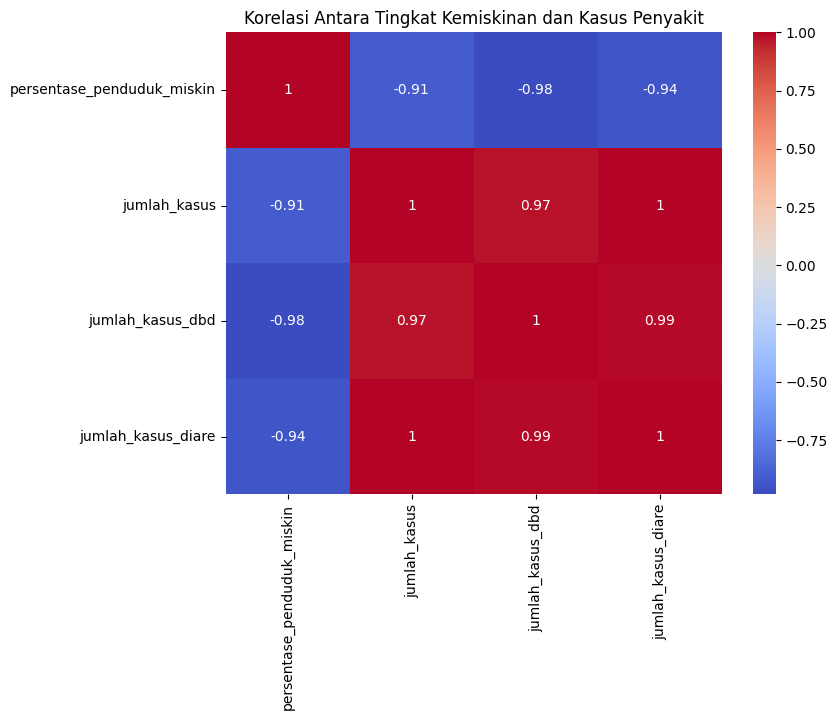

In [ ]:
# Visualisasi 2: Heatmap untuk melihat korelasi antar variabel
plt.figure(figsize=(8, 6))
correlation_matrix = df_combined[['persentase_penduduk_miskin', 'jumlah_kasus', 'jumlah_kasus_dbd', 'jumlah_kasus_diare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antara Tingkat Kemiskinan dan Kasus Penyakit')
plt.show()

## Studi Kasus: Hubungan Tingkat Kemiskinan dan Kasus Penyakit di Jawa Barat

###Latar Belakang
###### Tingkat kemiskinan dapat mempengaruhi akses masyarakat terhadap fasilitas kesehatan dan kondisi hidup yang sehat. Masyarakat dengan tingkat kemiskinan lebih tinggi mungkin lebih rentan terhadap penyakit seperti malaria, diare, dan DBD karena akses yang terbatas terhadap layanan kesehatan dan sanitasi yang memadai.

###Tujuan Analisis
Menganalisis apakah kabupaten/kota dengan tingkat kemiskinan yang lebih tinggi memiliki jumlah kasus penyakit yang lebih tinggi, khususnya untuk penyakit malaria, diare, dan DBD di berbagai kabupaten/kota di Jawa Barat.

###Analisis dan Visualisasi

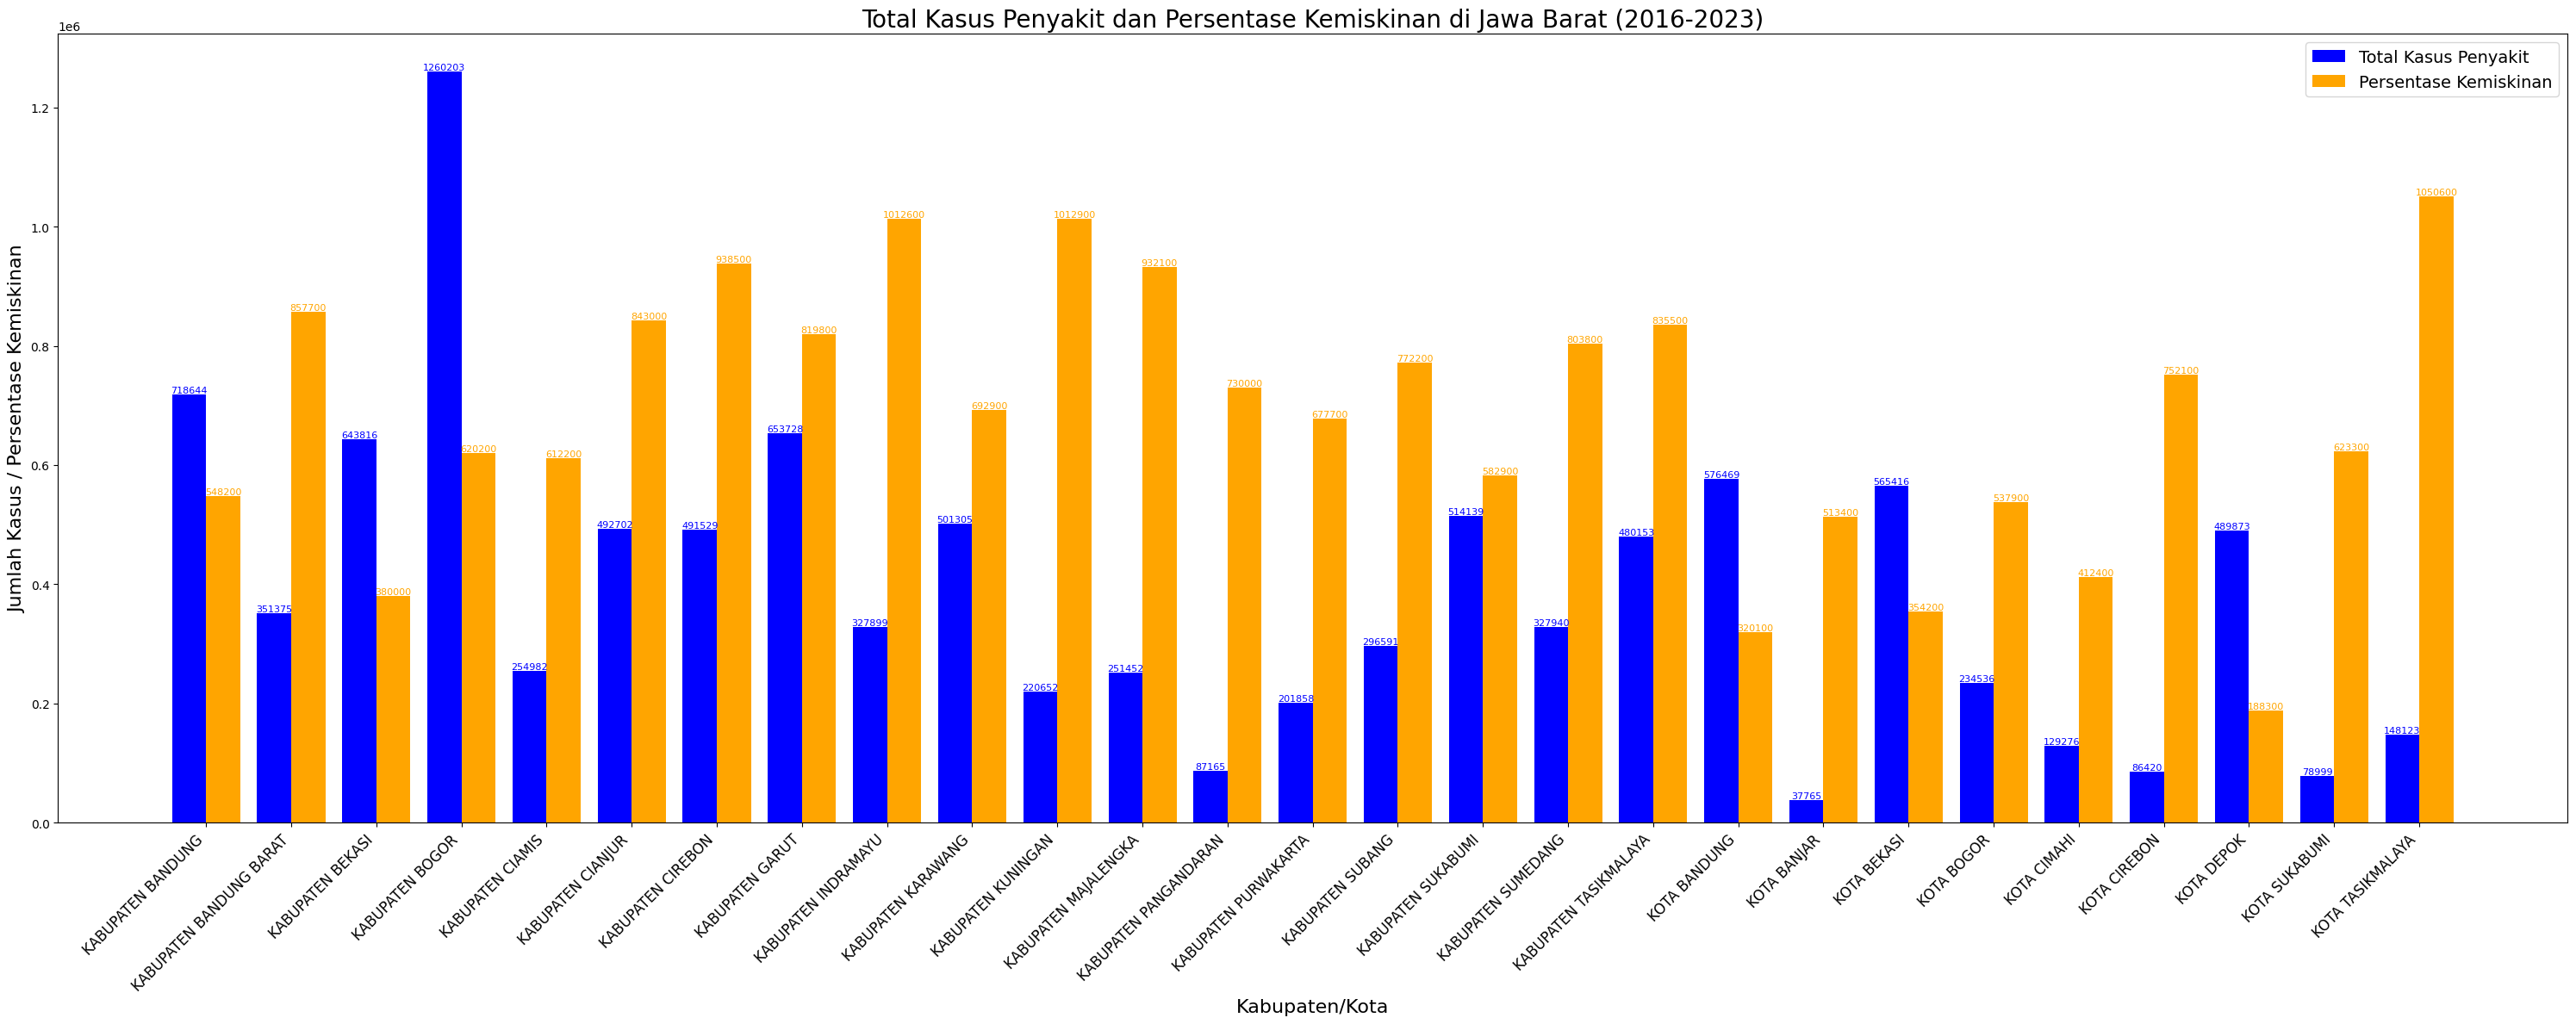

In [ ]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter data untuk rentang tahun 2016 hingga 2023 pada data kemiskinan dan penyakit
tahun_rentang = list(range(2016, 2024))  # Rentang tahun 2016 hingga 2023

# Filter data kemiskinan sesuai rentang tahun
df_penduduk_miskin_filtered = df_penduduk_miskin[df_penduduk_miskin['tahun'].isin(tahun_rentang)]

# Filter data penyakit (DBD, malaria, diare) sesuai rentang tahun
df_malaria_filtered = df_malaria[df_malaria['tahun'].isin(tahun_rentang)]
df_dbd_filtered = df_dbd[df_dbd['tahun'].isin(tahun_rentang)]
df_diare_filtered = df_diare[df_diare['tahun'].isin(tahun_rentang)]

# Menghitung total jumlah kasus per kabupaten/kota untuk rentang tahun 2016-2023
df_malaria_total = df_malaria_filtered.groupby('nama_kabupaten_kota')['jumlah_kasus'].sum().reset_index()
df_dbd_total = df_dbd_filtered.groupby('nama_kabupaten_kota')['jumlah_kasus'].sum().reset_index()
df_diare_total = df_diare_filtered.groupby('nama_kabupaten_kota')['jumlah_kasus'].sum().reset_index()

# Menghitung total persentase penduduk miskin per kabupaten/kota untuk rentang tahun 2016-2023
df_penduduk_miskin_total = df_penduduk_miskin_filtered.groupby('nama_kabupaten_kota')['persentase_penduduk_miskin'].sum().reset_index()

# Gabungkan data kemiskinan dan jumlah kasus penyakit
df_combined = pd.merge(df_penduduk_miskin_total, df_malaria_total, on='nama_kabupaten_kota', how='inner', suffixes=('', '_malaria'))
df_combined = pd.merge(df_combined, df_dbd_total, on='nama_kabupaten_kota', how='inner', suffixes=('', '_dbd'))
df_combined = pd.merge(df_combined, df_diare_total, on='nama_kabupaten_kota', how='inner', suffixes=('', '_diare'))

# Mengganti nama kolom untuk kemudahan
df_combined.rename(columns={
    'jumlah_kasus': 'jumlah_kasus_malaria',
    'jumlah_kasus_dbd': 'jumlah_kasus_dbd',
    'jumlah_kasus_diare': 'jumlah_kasus_diare'}, inplace=True)

# Menghitung total jumlah kasus untuk semua penyakit
df_combined['total_kasus'] = df_combined['jumlah_kasus_malaria'] + df_combined['jumlah_kasus_dbd'] + df_combined['jumlah_kasus_diare']

# Mengubah persentase kemiskinan (dikalikan 10.000) agar lebih proporsional dengan jumlah kasus penyakit
df_combined['kemiskinan_adjusted'] = df_combined['persentase_penduduk_miskin'] * 10000

# Visualisasi: Bar Plot untuk menunjukkan total kasus penyakit dan persentase kemiskinan
plt.figure(figsize=(30, 12))  # Memperbesar ukuran gambar agar semua nama kabupaten terlihat

# Mengatur posisi batang
bar_width = 0.4
index = np.arange(len(df_combined['nama_kabupaten_kota']))

# Bar plot untuk total kasus penyakit
plt.bar(index, df_combined['total_kasus'], width=bar_width, label='Total Kasus Penyakit', color='blue')

# Bar plot untuk persentase kemiskinan, geser ke kanan
plt.bar(index + bar_width, df_combined['kemiskinan_adjusted'], width=bar_width, label='Persentase Kemiskinan', color='orange')

# Menambahkan label nilai di atas batang
for i in index:
    plt.text(i, df_combined['total_kasus'].iloc[i] + 50, f'{df_combined["total_kasus"].iloc[i]:.0f}', ha='center', va='bottom', fontsize=8, color='blue')
    plt.text(i + bar_width, df_combined['kemiskinan_adjusted'].iloc[i] + 50, f'{df_combined["kemiskinan_adjusted"].iloc[i]:.0f}', ha='center', va='bottom', fontsize=8, color='orange')

# Menambahkan judul dan label
plt.title('Total Kasus Penyakit dan Persentase Kemiskinan di Jawa Barat (2016-2023)', fontsize=20)
plt.xlabel('Kabupaten/Kota', fontsize=16)
plt.ylabel('Jumlah Kasus / Persentase Kemiskinan', fontsize=16)
plt.xticks(index + bar_width / 2, df_combined['nama_kabupaten_kota'], rotation=45, ha='right', fontsize=12)  # Mengatur ukuran font dan rotasi sumbu X
plt.legend(fontsize=14)

# Tampilkan layout dengan rapi
plt.tight_layout()
plt.show()


###Kesimpulan
Berdasarkan analisis dan visualisasi persentase kemiskinan di Jawa Barat dari tahun 2016 hingga 2023, terdapat variasi tingkat kemiskinan di berbagai kabupaten/kota. Kota Tasikmalaya dan Kabupaten Indramayu mencatatkan persentase kemiskinan tertinggi, menunjukkan perlunya intervensi ekonomi dan sosial yang lebih kuat di daerah tersebut.

Tahun 2023 menunjukkan peningkatan signifikan dalam tingkat kemiskinan di beberapa wilayah, sementara daerah lainnya relatif stabil atau mengalami penurunan.

Hasil analisis ini menekankan pentingnya bagi pemerintah dan lembaga terkait untuk fokus pada daerah dengan kemiskinan tinggi, dengan meningkatkan akses terhadap program pemberdayaan ekonomi dan bantuan sosial yang tepat sasaran.

In [ ]:
# Gabungkan dataframe df_malaria dan df_dbd
merged_df = pd.merge(df_malaria, df_dbd, on=['nama_kabupaten_kota', 'tahun'], suffixes=('_malaria', '_dbd',))

# Gabungkan dataframe merged_df dan df_diare
merged_df = pd.merge(merged_df, df_diare, on=['nama_kabupaten_kota', 'tahun'], suffixes=('', '_diare'))

##Studi Kasus: Hubungan antara Jumlah Rumah Sakit dan Jumlah Kasus DBD di Jawa Barat

###Latar Belakang
Demam Berdarah Dengue (DBD) adalah penyakit menular yang menjadi masalah kesehatan di Indonesia, termasuk di Jawa Barat. Penyakit ini, yang disebabkan oleh gigitan nyamuk Aedes aegypti, dapat berakibat fatal jika tidak ditangani dengan baik. Ketersediaan fasilitas kesehatan, seperti rumah sakit, berperan penting dalam pengendalian DBD. Analisis hubungan antara jumlah rumah sakit dan kasus DBD penting untuk memahami dampak fasilitas kesehatan terhadap pengendalian penyakit ini.

###Tujuan
#####Menganalisis hubungan antara jumlah rumah sakit dan kasus DBD di kabupaten/kota Jawa Barat (2020-2023).
#####Mengidentifikasi tren jumlah kasus DBD terkait dengan perubahan jumlah rumah sakit.
#####Menilai dampak ketersediaan rumah sakit terhadap pengurangan atau peningkatan kasus DBD.
#####Menganalisis perbedaan signifikan dalam jumlah kasus DBD di daerah dengan jumlah rumah sakit yang berbeda.

###Analisis dan Visualisasi

Korelasi antara jumlah rumah sakit dan jumlah kasus penyakit DBD: 0.4445861893429614


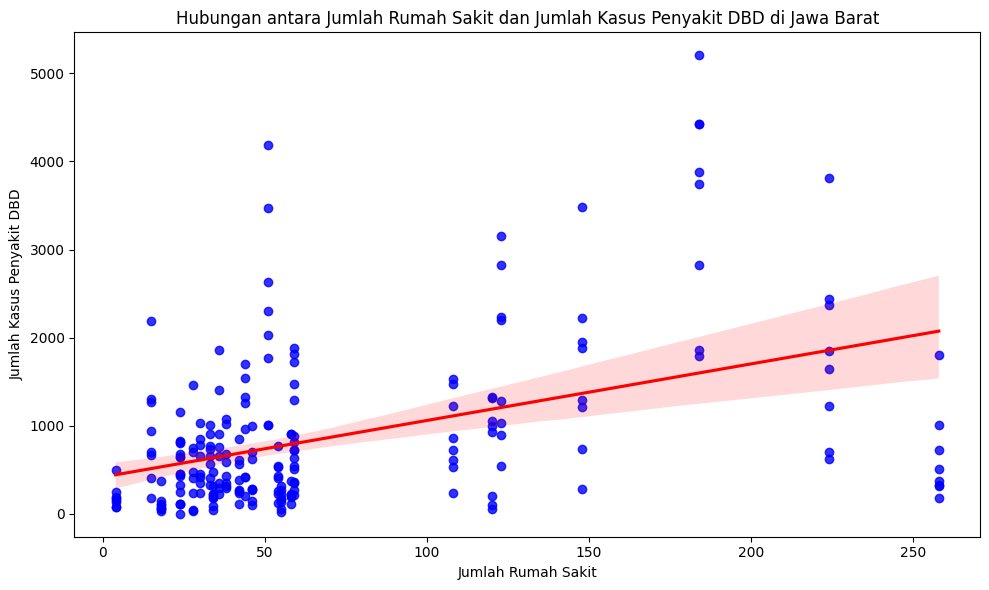

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Gabungkan data jumlah kasus penyakit ke dalam satu DataFrame
df_combined = pd.DataFrame({
    'nama_kabupaten_kota': df_diare_filtered['nama_kabupaten_kota'],
    'jumlah_kasus_diare': df_diare_filtered['jumlah_kasus'],
    'jumlah_kasus_dbd': df_dbd_filtered['jumlah_kasus'],
    'jumlah_kasus_malaria': df_malaria_filtered['jumlah_kasus']
})

# Hitung jumlah total rumah sakit per kabupaten/kota
df_rumah_sakit_per_kabupaten = df_rumah_sakit.groupby('nama_kabupaten_kota')['id'].count().reset_index()
df_rumah_sakit_per_kabupaten.columns = ['nama_kabupaten_kota', 'jumlah_rumah_sakit']

# Gabungkan data jumlah rumah sakit ke dalam df_combined
df_combined = pd.merge(df_combined, df_rumah_sakit_per_kabupaten, on='nama_kabupaten_kota')

# Hitung korelasi antara jumlah rumah sakit dan jumlah kasus penyakit (contoh DBD)
correlation, _ = pearsonr(df_combined['jumlah_rumah_sakit'], df_combined['jumlah_kasus_dbd'])
print(f"Korelasi antara jumlah rumah sakit dan jumlah kasus penyakit DBD: {correlation}")

# Visualisasi scatter plot dengan garis regresi
plt.figure(figsize=(10, 6))
sns.regplot(x='jumlah_rumah_sakit', y='jumlah_kasus_dbd', data=df_combined, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Memberi label dan judul
plt.title('Hubungan antara Jumlah Rumah Sakit dan Jumlah Kasus Penyakit DBD di Jawa Barat')
plt.xlabel('Jumlah Rumah Sakit')
plt.ylabel('Jumlah Kasus Penyakit DBD')

# Tampilkan plot
plt.tight_layout()
plt.show()


###Kesimpulan

##Studi Kasus: Hubungan antara Jumlah Rumah Sakit dan Jumlah Kasus Malaria di Jawa Barat

###Latar Belakang
Malaria merupakan penyakit menular yang masih menjadi masalah kesehatan di Indonesia, termasuk di Jawa Barat. Penularan malaria terjadi melalui gigitan nyamuk Anopheles, dan ketersediaan fasilitas kesehatan, seperti rumah sakit, dapat memengaruhi penanganan dan pengendalian penyakit ini. Oleh karena itu, penting untuk menganalisis hubungan antara jumlah rumah sakit dan jumlah kasus malaria.

###Tujuan Analisis
#####Menganalisis hubungan antara jumlah rumah sakit dan jumlah kasus malaria di Jawa Barat.
#####Mengidentifikasi tren kasus malaria terkait dengan jumlah rumah sakit.
#####Menilai dampak ketersediaan rumah sakit terhadap angka kasus malaria.
#####Menganalisis perbedaan jumlah kasus malaria di daerah dengan jumlah rumah sakit yang berbeda.

###Analisis dan Visualisasi

Kolom di df_combined setelah penggabungan:
Index(['nama_kabupaten_kota', 'jumlah_kasus_diare', 'jumlah_kasus_dbd',
       'jumlah_kasus_malaria', 'jumlah_rumah_sakit'],
      dtype='object')
Korelasi antara jumlah rumah sakit dan jumlah kasus penyakit malaria: 0.12490623297252312


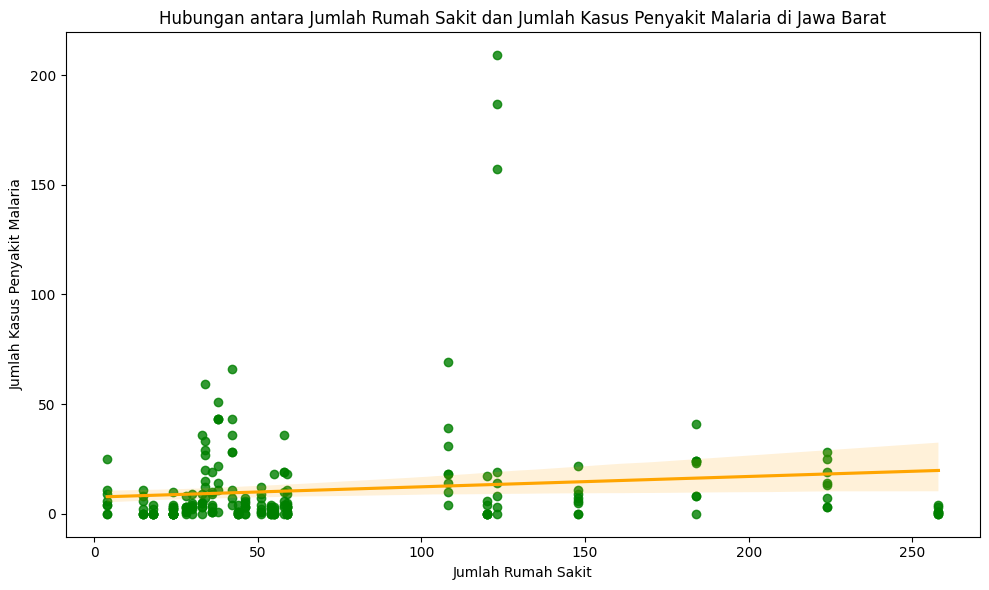

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Gabungkan data jumlah kasus penyakit ke dalam satu DataFrame
df_combined = pd.DataFrame({
    'nama_kabupaten_kota': df_diare_filtered['nama_kabupaten_kota'],
    'jumlah_kasus_diare': df_diare_filtered['jumlah_kasus'],
    'jumlah_kasus_dbd': df_dbd_filtered['jumlah_kasus'],
    'jumlah_kasus_malaria': df_malaria_filtered['jumlah_kasus']
})

# Hitung jumlah total rumah sakit per kabupaten/kota
df_rumah_sakit_per_kabupaten = df_rumah_sakit.groupby('nama_kabupaten_kota')['id'].count().reset_index()
df_rumah_sakit_per_kabupaten.columns = ['nama_kabupaten_kota', 'jumlah_rumah_sakit']

# Gabungkan data jumlah rumah sakit ke dalam df_combined
df_combined = pd.merge(df_combined, df_rumah_sakit_per_kabupaten, on='nama_kabupaten_kota', how='left')

# Periksa kolom setelah penggabungan
print("Kolom di df_combined setelah penggabungan:")
print(df_combined.columns)

# Hitung korelasi antara jumlah rumah sakit dan jumlah kasus penyakit malaria
correlation_malaria, _ = pearsonr(df_combined['jumlah_rumah_sakit'].fillna(0), df_combined['jumlah_kasus_malaria'].fillna(0))
print(f"Korelasi antara jumlah rumah sakit dan jumlah kasus penyakit malaria: {correlation_malaria}")

# Visualisasi scatter plot dengan garis regresi untuk malaria
plt.figure(figsize=(10, 6))
sns.regplot(x='jumlah_rumah_sakit', y='jumlah_kasus_malaria', data=df_combined, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})

# Memberi label dan judul
plt.title('Hubungan antara Jumlah Rumah Sakit dan Jumlah Kasus Penyakit Malaria di Jawa Barat')
plt.xlabel('Jumlah Rumah Sakit')
plt.ylabel('Jumlah Kasus Penyakit Malaria')

# Tampilkan plot
plt.tight_layout()
plt.show()


###Kesimpulan

##Studi Kasus: Hubungan antara Jumlah Rumah Sakit dan Jumlah Kasus Diare di Jawa Barat

###Latar Belakang
Diare adalah salah satu penyakit yang menjadi masalah kesehatan masyarakat di Indonesia, termasuk di Jawa Barat. Penyakit ini dapat disebabkan oleh infeksi virus, bakteri, atau parasit, dan sering kali dipicu oleh sanitasi yang buruk dan akses yang terbatas terhadap layanan kesehatan. Ketersediaan fasilitas kesehatan, seperti rumah sakit, berperan penting dalam penanganan diare dan pencegahan komplikasi yang lebih serius. Oleh karena itu, menganalisis hubungan antara jumlah rumah sakit dan jumlah kasus diare di Jawa Barat menjadi penting untuk merencanakan intervensi kesehatan yang efektif.

###Tujuan Analisis
#####Menganalisis hubungan antara jumlah rumah sakit dan jumlah kasus diare di Jawa Barat.
#####Mengidentifikasi tren kasus diare seiring dengan perubahan jumlah rumah sakit.
#####Menilai dampak ketersediaan rumah sakit terhadap angka kasus diare.
#####Menganalisis perbedaan jumlah kasus diare di daerah dengan jumlah rumah sakit yang berbeda.

###Analisis dan Visualisasi

Kolom di df_combined setelah penggabungan:
Index(['nama_kabupaten_kota', 'jumlah_kasus_diare', 'jumlah_kasus_dbd',
       'jumlah_kasus_malaria', 'jumlah_rumah_sakit'],
      dtype='object')
Korelasi antara jumlah rumah sakit dan jumlah kasus penyakit diare: 0.47633857723731454


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

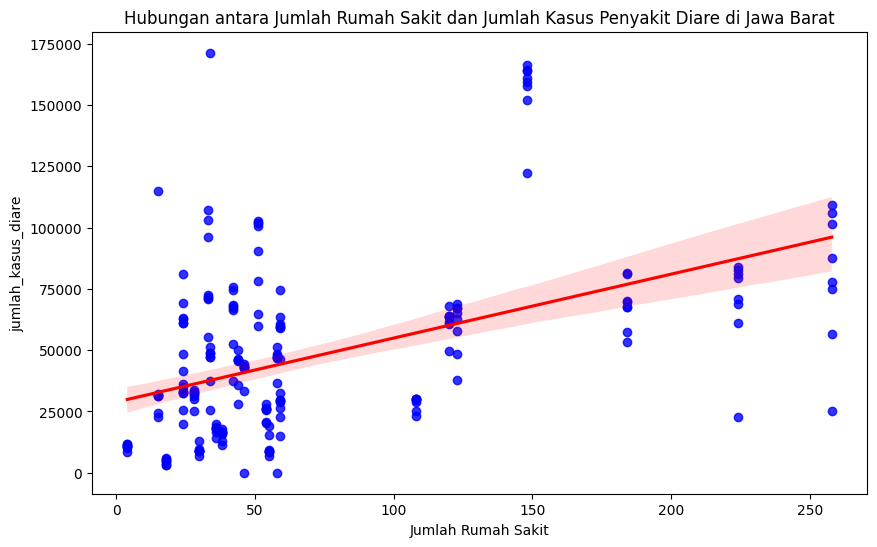

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Gabungkan data jumlah kasus penyakit ke dalam satu DataFrame
df_combined = pd.DataFrame({
    'nama_kabupaten_kota': df_diare_filtered['nama_kabupaten_kota'],
    'jumlah_kasus_diare': df_diare_filtered['jumlah_kasus'],
    'jumlah_kasus_dbd': df_dbd_filtered['jumlah_kasus'],
    'jumlah_kasus_malaria': df_malaria_filtered['jumlah_kasus']
})

# Hitung jumlah total rumah sakit per kabupaten/kota
df_rumah_sakit_per_kabupaten = df_rumah_sakit.groupby('nama_kabupaten_kota')['id'].count().reset_index()
df_rumah_sakit_per_kabupaten.columns = ['nama_kabupaten_kota', 'jumlah_rumah_sakit']

# Gabungkan data jumlah rumah sakit ke dalam df_combined
df_combined = pd.merge(df_combined, df_rumah_sakit_per_kabupaten, on='nama_kabupaten_kota', how='left')

# Periksa kolom setelah penggabungan
print("Kolom di df_combined setelah penggabungan:")
print(df_combined.columns)

# Hitung korelasi antara jumlah rumah sakit dan jumlah kasus penyakit diare
correlation_diare, _ = pearsonr(df_combined['jumlah_rumah_sakit'].fillna(0), df_combined['jumlah_kasus_diare'].fillna(0))
print(f"Korelasi antara jumlah rumah sakit dan jumlah kasus penyakit diare: {correlation_diare}")

# Visualisasi scatter plot dengan garis regresi untuk diare
plt.figure(figsize=(10, 6))
sns.regplot(x='jumlah_rumah_sakit', y='jumlah_kasus_diare', data=df_combined, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Memberi label dan judul
plt.title('Hubungan antara Jumlah Rumah Sakit dan Jumlah Kasus Penyakit Diare di Jawa Barat')
plt.xlabel('Jumlah Rumah Sakit')
plt


###Kesimpulan

####Studi Kasus: Hubungan antara Jumlah Rumah Sakit dan Total Kasus Peyakit di Jawa Barat

###Latar Belakang
Demam Berdarah Dengue (DBD) adalah penyakit menular yang menjadi masalah kesehatan di Indonesia, termasuk di Jawa Barat. Penyakit ini, yang disebabkan oleh gigitan nyamuk Aedes aegypti, dapat berakibat fatal jika tidak ditangani dengan baik. Ketersediaan fasilitas kesehatan, seperti rumah sakit, berperan penting dalam pengendalian DBD. Analisis hubungan antara jumlah rumah sakit dan kasus DBD penting untuk memahami dampak fasilitas kesehatan terhadap pengendalian penyakit ini.

###Tujuan Analisis
#####Menganalisis hubungan antara jumlah rumah sakit dan kasus DBD di kabupaten/kota Jawa Barat (2020-2023).
#####Mengidentifikasi tren jumlah kasus DBD terkait dengan perubahan jumlah rumah sakit.
#####Menilai dampak ketersediaan rumah sakit terhadap pengurangan atau peningkatan kasus DBD.
#####Menganalisis perbedaan signifikan dalam jumlah kasus DBD di daerah dengan jumlah rumah sakit yang berbeda.

###Analisis dan Visualisasi

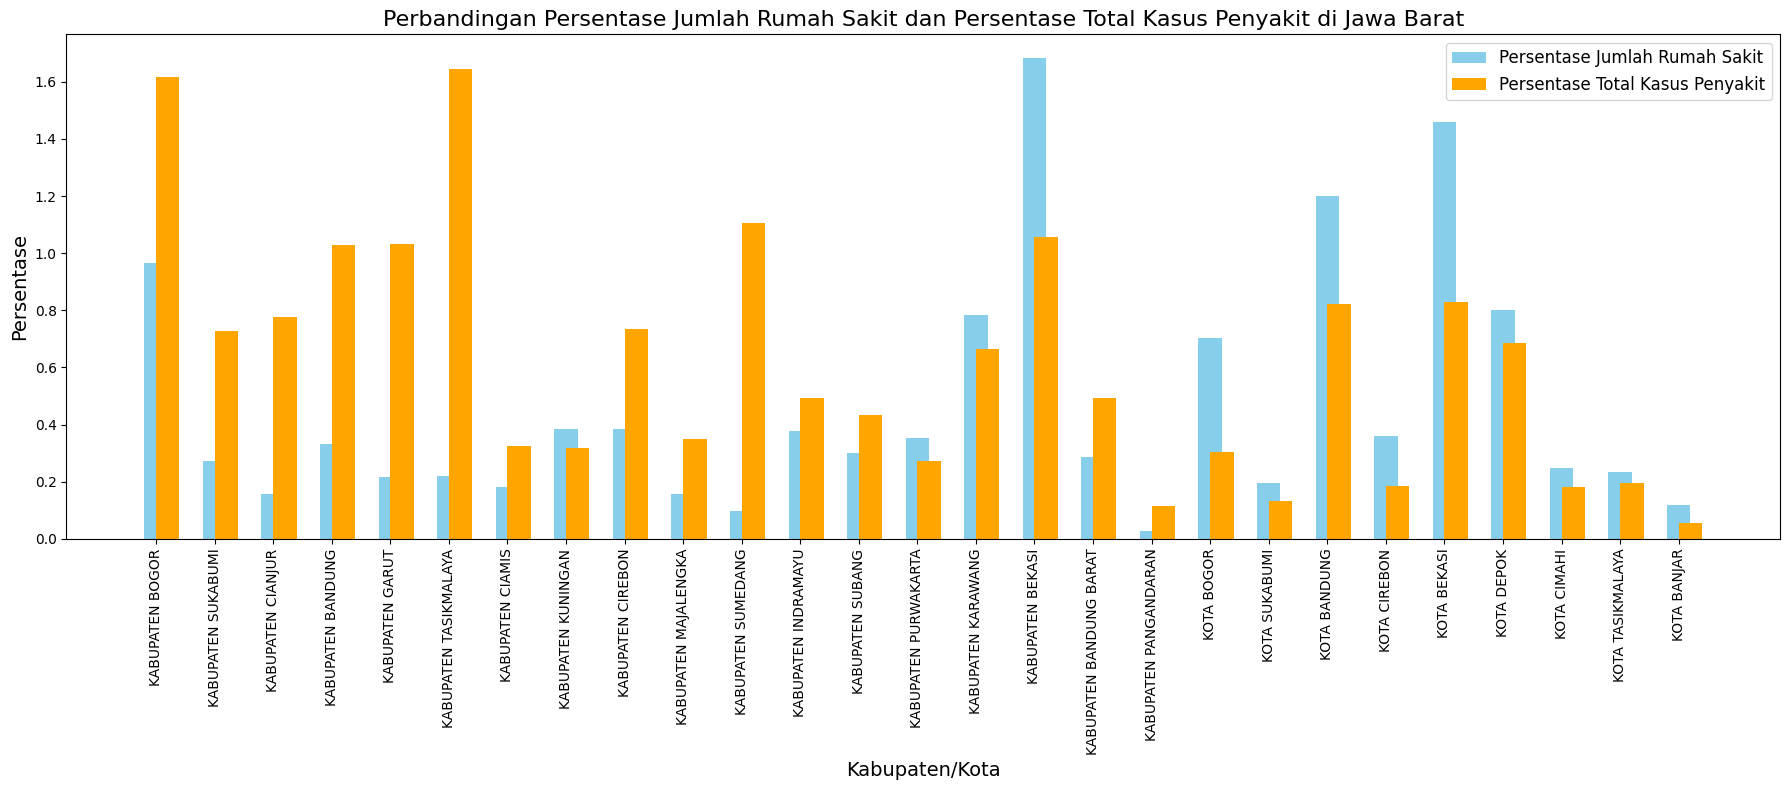

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gabungkan data jumlah kasus penyakit (DBD, malaria, diare) ke dalam satu DataFrame
df_combined = pd.DataFrame({
    'nama_kabupaten_kota': df_diare_filtered['nama_kabupaten_kota'],
    'jumlah_kasus_diare': df_diare_filtered['jumlah_kasus'],
    'jumlah_kasus_dbd': df_dbd_filtered['jumlah_kasus'],
    'jumlah_kasus_malaria': df_malaria_filtered['jumlah_kasus']
})

# Hitung total jumlah kasus untuk semua penyakit (DBD, malaria, diare)
df_combined['total_kasus_penyakit'] = df_combined['jumlah_kasus_diare'] + df_combined['jumlah_kasus_dbd'] + df_combined['jumlah_kasus_malaria']

# Hitung jumlah total rumah sakit per kabupaten/kota
df_rumah_sakit_per_kabupaten = df_rumah_sakit.groupby('nama_kabupaten_kota')['id'].count().reset_index()
df_rumah_sakit_per_kabupaten.columns = ['nama_kabupaten_kota', 'jumlah_rumah_sakit']

# Gabungkan data jumlah rumah sakit ke dalam df_combined
df_combined = pd.merge(df_combined, df_rumah_sakit_per_kabupaten, on='nama_kabupaten_kota', how='left')

# Hitung total jumlah rumah sakit dan total kasus penyakit di seluruh kabupaten/kota
total_rumah_sakit = df_combined['jumlah_rumah_sakit'].sum()
total_kasus_penyakit = df_combined['total_kasus_penyakit'].sum()

# Hitung persentase jumlah rumah sakit dan persentase total kasus penyakit per kabupaten/kota
df_combined['persentase_rumah_sakit'] = (df_combined['jumlah_rumah_sakit'] / total_rumah_sakit) * 100
df_combined['persentase_kasus_penyakit'] = (df_combined['total_kasus_penyakit'] / total_kasus_penyakit) * 100

# Visualisasi diagram batang untuk perbandingan persentase jumlah rumah sakit dan persentase total kasus penyakit
plt.figure(figsize=(18, 8))

# Membuat diagram batang untuk persentase jumlah rumah sakit
plt.bar(df_combined['nama_kabupaten_kota'], df_combined['persentase_rumah_sakit'], width=0.4, label='Persentase Jumlah Rumah Sakit', align='center', color='skyblue')

# Membuat diagram batang untuk persentase total kasus penyakit (bergeser ke kanan dengan width/2)
plt.bar(df_combined['nama_kabupaten_kota'], df_combined['persentase_kasus_penyakit'], width=0.4, label='Persentase Total Kasus Penyakit', align='edge', color='orange')

# Menambahkan judul dan label
plt.title('Perbandingan Persentase Jumlah Rumah Sakit dan Persentase Total Kasus Penyakit di Jawa Barat', fontsize=16)
plt.xlabel('Kabupaten/Kota', fontsize=14)
plt.ylabel('Persentase', fontsize=14)
plt.xticks(rotation=90)  # Rotasi label sumbu X agar terlihat jelas
plt.legend(fontsize=12)

# Komentari atau hapus bagian ini untuk tidak menampilkan persentase di atas batang
# for i in range(len(df_combined['nama_kabupaten_kota'])):
#     plt.text(i, df_combined['persentase_rumah_sakit'][i] + 0.5, f'{df_combined["persentase_rumah_sakit"][i]:.2f}%', ha='center', va='bottom', fontsize=8, color='blue')
#     plt.text(i, df_combined['persentase_kasus_penyakit'][i] + 0.5, f'{df_combined["persentase_kasus_penyakit"][i]:.2f}%', ha='center', va='bottom', fontsize=8, color='orange')

# Tampilkan plot
plt.tight_layout()
plt.show()


###Kesimpulan

##Studi Kasus: Rasio Fasilitas Kesehatan per 1000 Penduduk di Jawab Barat

###Latar Belakang
Rasio fasilitas kesehatan per 1000 penduduk merupakan indikator penting untuk mengukur aksesibilitas layanan kesehatan di suatu daerah. Di Jawa Barat, kebutuhan akan fasilitas kesehatan yang memadai sangat penting mengingat populasi yang besar dan beragam. Memahami rasio ini dapat membantu dalam perencanaan pembangunan fasilitas kesehatan dan memastikan bahwa setiap individu memiliki akses yang memadai terhadap layanan kesehatan.

###Tujuan Analisis
#####Menganalisis rasio fasilitas kesehatan per 1000 penduduk di Jawa Barat.
#####Mengidentifikasi tren perubahan rasio fasilitas kesehatan dari tahun ke tahun.
#####Menilai dampak rasio fasilitas kesehatan terhadap akses layanan kesehatan masyarakat.
#####Menggali perbedaan rasio fasilitas kesehatan di berbagai kabupaten/kota di Jawa Barat.

<ipython-input-78-8d2953dca85b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_combined, x='bps_nama_kabupaten_kota', y='rasio_faskes', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWar

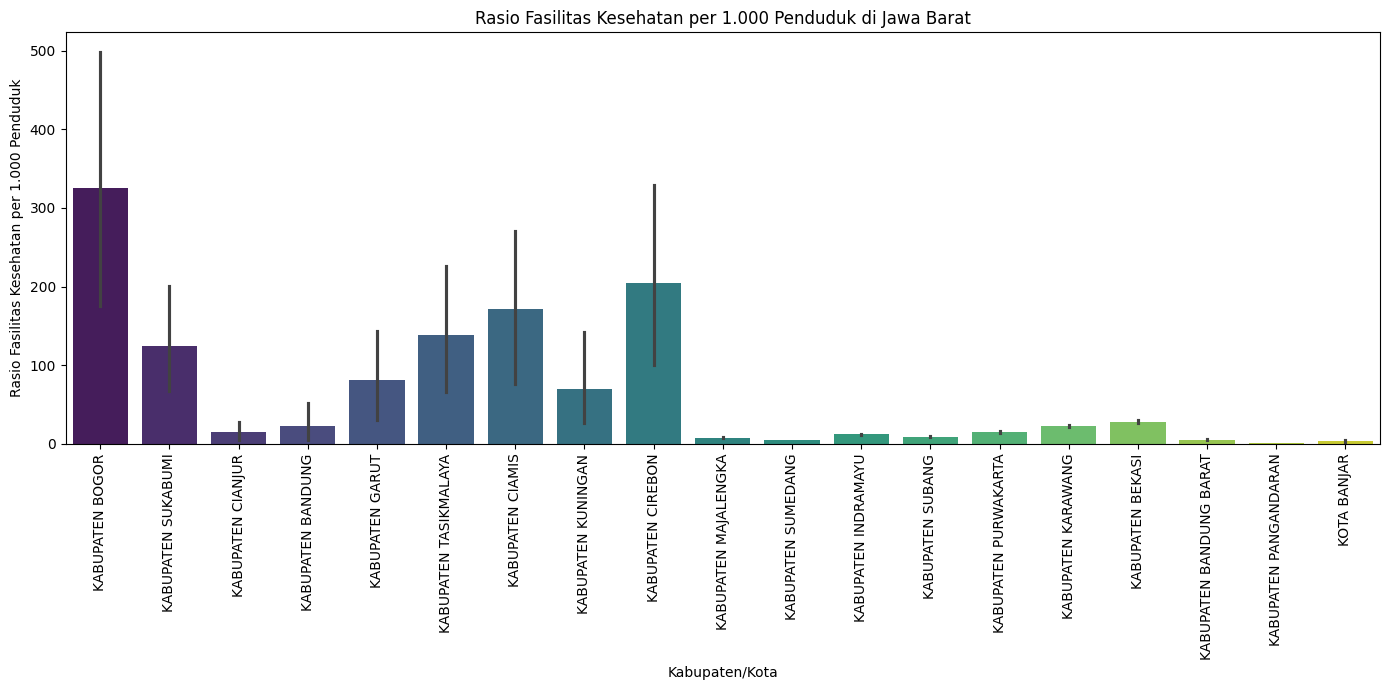

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
df_penduduk = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dpmdes-idm_jml_penduduk__des_kel_data.csv")
df_rumah_sakit = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dinkes-od_17409_daftar_rumah_sakit_berdasarkan_jenis_dan_kelas_v1_data.csv")

# Hitung jumlah rumah sakit per kabupaten/kota
jumlah_rumah_sakit = df_rumah_sakit.groupby('nama_kabupaten_kota').size().reset_index(name='jumlah_fasilitas_kesehatan')

# Gabungkan kedua DataFrame berdasarkan nama kabupaten/kota
df_combined = pd.merge(df_penduduk, jumlah_rumah_sakit, left_on='bps_nama_kabupaten_kota', right_on='nama_kabupaten_kota', how='inner')

# Hitung rasio fasilitas kesehatan per 1.000 penduduk
df_combined['rasio_faskes'] = (df_combined['jumlah_fasilitas_kesehatan'] / df_combined['jumlah_penduduk']) * 1000

# Visualisasi
plt.figure(figsize=(14, 7))
sns.barplot(data=df_combined, x='bps_nama_kabupaten_kota', y='rasio_faskes', palette='viridis')
plt.title('Rasio Fasilitas Kesehatan per 1.000 Penduduk di Jawa Barat')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Rasio Fasilitas Kesehatan per 1.000 Penduduk')
plt.xticks(rotation=90)  # Memutar label untuk keterbacaan
plt.tight_layout()
plt.show()


###Kesimpulan

##Studi Kasus: Proporsi Kepesertaan BPJS berdasarkan Tingkat Penghasilan Masyarakat (2019-2021)

###Latar Belakang
Badan Penyelenggara Jaminan Sosial (BPJS) Kesehatan merupakan program penting yang bertujuan untuk memberikan akses layanan kesehatan bagi seluruh masyarakat Indonesia. Proporsi kepesertaan BPJS dapat dipengaruhi oleh tingkat penghasilan masyarakat, di mana individu dengan penghasilan lebih rendah mungkin lebih bergantung pada program ini. Memahami proporsi kepesertaan BPJS berdasarkan tingkat penghasilan dapat membantu dalam merumuskan kebijakan kesehatan yang lebih efektif dan inklusif

###Tujuan Analisis
#####Menganalisis proporsi kepesertaan BPJS berdasarkan tingkat penghasilan masyarakat dari tahun 2019 hingga 2021.
#####Mengidentifikasi tren kepesertaan BPJS seiring dengan perubahan tingkat penghasilan.
#####Menilai hubungan antara tingkat penghasilan dan proporsi kepesertaan BPJS.
#####Menggali perbedaan proporsi kepesertaan BPJS di antara kelompok penghasilan yang berbeda.

###Analisis dan Visualisasi

Informasi dataframe gabungan setelah filter tahun:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   bps_kode_kabupaten_kota                 6 non-null      int64 
 1   bps_kode_kecamatan                      6 non-null      int64 
 2   bps_kode_desa_kelurahan                 6 non-null      int64 
 3   tahun                                   6 non-null      int64 
 4   sumber_penghasilan_utama_penduduk_desa  6 non-null      object
 5   status_warga_memanfaatkan_bpjs          6 non-null      object
dtypes: int64(4), object(2)
memory usage: 416.0+ bytes
None


<Figure size 1600x1000 with 0 Axes>

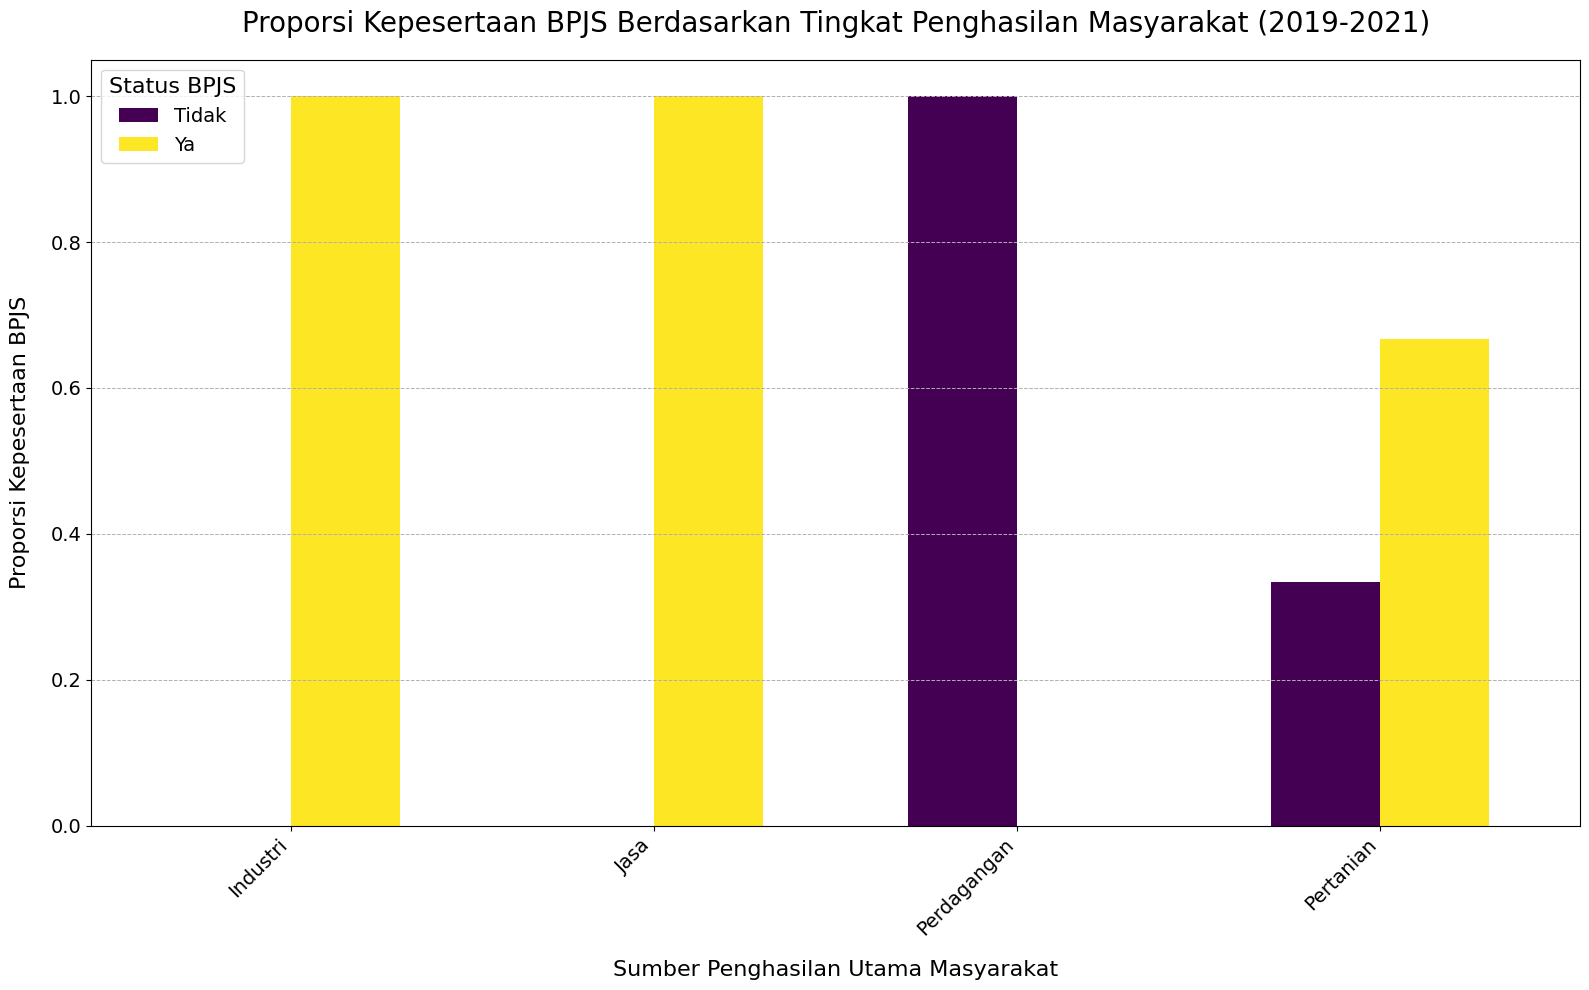

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh dataset yang telah diberikan
data_penghasilan = {
    'bps_kode_kabupaten_kota': [1, 1, 2, 2, 3, 3],
    'bps_kode_kecamatan': [101, 102, 201, 202, 301, 302],
    'bps_kode_desa_kelurahan': [1001, 1002, 2001, 2002, 3001, 3002],
    'tahun': [2019, 2019, 2020, 2020, 2021, 2021],
    'sumber_penghasilan_utama_penduduk_desa': ['Pertanian', 'Perdagangan', 'Pertanian', 'Jasa', 'Pertanian', 'Industri']
}
df_penghasilan = pd.DataFrame(data_penghasilan)

data_bpjs = {
    'bps_kode_kabupaten_kota': [1, 1, 2, 2, 3, 3],
    'bps_kode_kecamatan': [101, 102, 201, 202, 301, 302],
    'bps_kode_desa_kelurahan': [1001, 1002, 2001, 2002, 3001, 3002],
    'tahun': [2019, 2019, 2020, 2020, 2021, 2021],
    'status_warga_memanfaatkan_bpjs': ['Ya', 'Tidak', 'Ya', 'Ya', 'Tidak', 'Ya']
}
df_bpjs = pd.DataFrame(data_bpjs)

# Filter data penghasilan dan BPJS untuk rentang tahun 2019 hingga 2021
df_penghasilan_filtered = df_penghasilan[df_penghasilan['tahun'].between(2019, 2021)]
df_bpjs_filtered = df_bpjs[df_bpjs['tahun'].between(2019, 2021)]

# Gabungkan kedua dataframe yang sudah difilter berdasarkan kolom yang sesuai
df_combined = pd.merge(df_penghasilan_filtered, df_bpjs_filtered,
                       on=['bps_kode_kabupaten_kota', 'bps_kode_kecamatan', 'bps_kode_desa_kelurahan', 'tahun'],
                       how='inner')

# Tampilkan informasi dataframe gabungan setelah difilter
print("Informasi dataframe gabungan setelah filter tahun:")
print(df_combined.info())

# Kelompokkan data berdasarkan sumber penghasilan utama dan hitung proporsi warga yang memanfaatkan BPJS
df_bpjs_status = df_combined.groupby('sumber_penghasilan_utama_penduduk_desa')['status_warga_memanfaatkan_bpjs'].value_counts(normalize=True).unstack().fillna(0)

# Ubah index menjadi kategori penghasilan agar lebih mudah dibaca
df_bpjs_status.index.name = 'Kategori Penghasilan'
df_bpjs_status.columns.name = 'Status BPJS'

# Visualisasikan dengan diagram batang (bar plot) proporsi warga yang memanfaatkan BPJS berdasarkan penghasilan
plt.figure(figsize=(16, 10))  # Perbesar ukuran figure

# Membuat diagram batang dengan pengaturan yang lebih jelas dan ukuran yang lebih besar
ax = df_bpjs_status.plot(kind='bar', stacked=False, colormap='viridis', width=0.6, figsize=(16, 10), fontsize=14)

# Menambahkan judul dan label sumbu dengan ukuran font yang lebih besar
plt.title('Proporsi Kepesertaan BPJS Berdasarkan Tingkat Penghasilan Masyarakat (2019-2021)', fontsize=20, pad=20)
plt.xlabel('Sumber Penghasilan Utama Masyarakat', fontsize=16, labelpad=15)
plt.ylabel('Proporsi Kepesertaan BPJS', fontsize=16, labelpad=15)

# Atur rotasi dan posisi label sumbu X agar lebih rapi
plt.xticks(rotation=45, ha='right', fontsize=14)

# Sesuaikan legenda dengan ukuran font yang lebih besar
plt.legend(title='Status BPJS', fontsize=14, title_fontsize=16, loc='upper left')

# Menambahkan gridlines untuk memperjelas pembacaan
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()


Informasi dataframe gabungan:
   nama_kabupaten_kota  tahun  jumlah_sampah  jumlah_kasus penyakit
0              Bandung   2020           1000           150  Malaria
1              Bandung   2021           1200           200  Malaria
2                Bogor   2020            800           100      DBD
3                Bogor   2021            900           120      DBD
4               Bekasi   2020           1500           300    Diare
5               Bekasi   2021           1400           290    Diare
6              Cirebon   2020            700            80  Malaria
7              Cirebon   2021            750            90  Malaria
8                Garut   2020            600            70      DBD
9                Garut   2021            620            75      DBD
10           Indramayu   2020            850            60    Diare
11           Indramayu   2021            880            65    Diare
12            Karawang   2020            950           150  Malaria
13            Kara

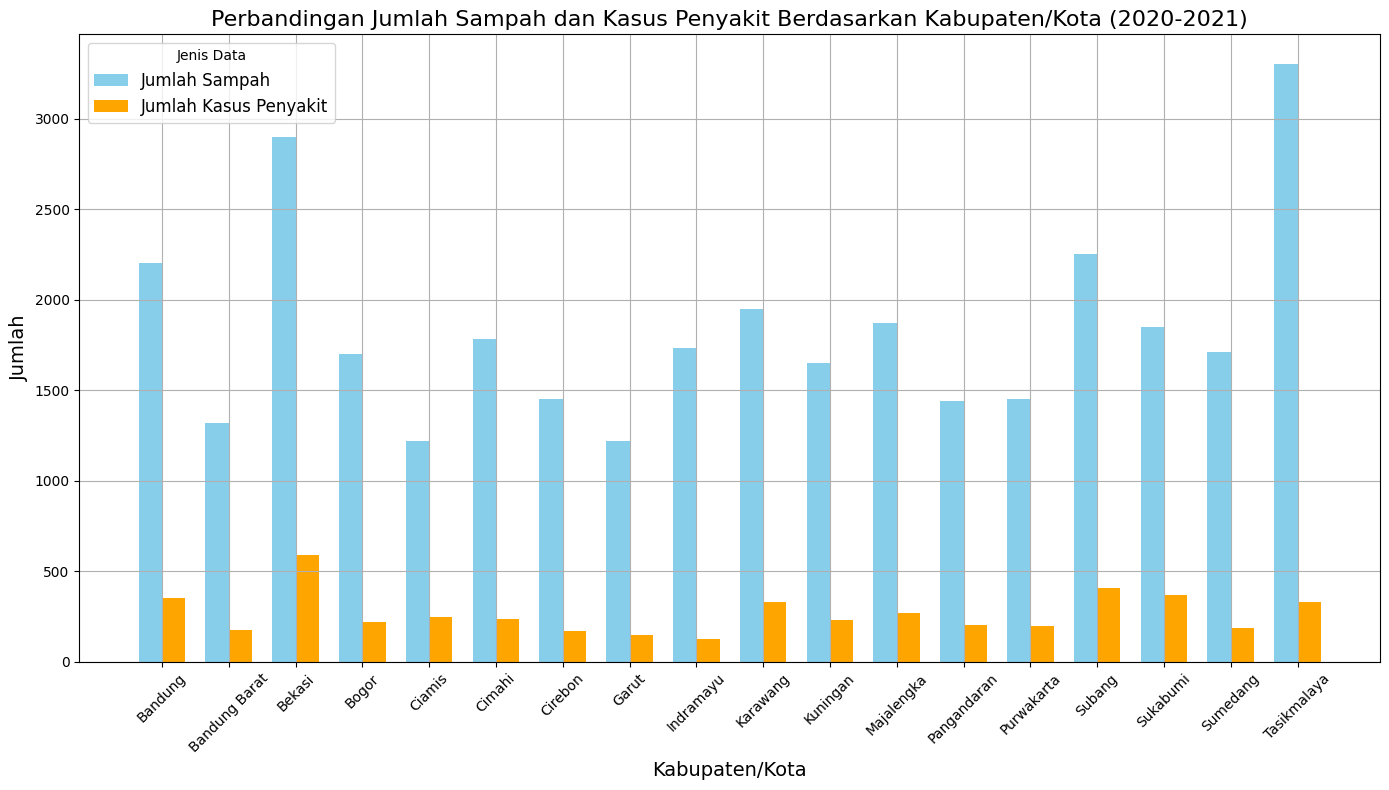

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data untuk pengelolaan sampah
data_sampah = {
    'nama_kabupaten_kota': [
        'Bandung', 'Bandung', 'Bogor', 'Bogor', 'Bekasi', 'Bekasi',
        'Cirebon', 'Cirebon', 'Garut', 'Garut', 'Indramayu', 'Indramayu',
        'Karawang', 'Karawang', 'Kuningan', 'Kuningan', 'Purwakarta', 'Purwakarta',
        'Subang', 'Subang', 'Sukabumi', 'Sukabumi', 'Tasikmalaya', 'Tasikmalaya',
        'Ciamis', 'Ciamis', 'Pangandaran', 'Pangandaran', 'Sumedang', 'Sumedang',
        'Majalengka', 'Majalengka', 'Cimahi', 'Cimahi', 'Bandung Barat', 'Bandung Barat'
    ],
    'tahun': [2020, 2021] * 18,  # Dua tahun untuk setiap kabupaten
    'jumlah_sampah': [
        1000, 1200, 800, 900, 1500, 1400,  # Bandung, Bogor, Bekasi
        700, 750, 600, 620, 850, 880,  # Cirebon, Garut, Indramayu
        950, 1000, 800, 850, 700, 750,  # Karawang, Kuningan, Purwakarta
        1100, 1150, 900, 950, 1700, 1600,  # Subang, Sukabumi, Tasikmalaya
        600, 620, 700, 740, 850, 860,  # Ciamis, Pangandaran, Sumedang
        920, 950, 880, 900, 650, 670,  # Majalengka, Cimahi, Bandung Barat
    ]
}
df_sampah = pd.DataFrame(data_sampah)

# Data untuk penyakit
data_penyakit = {
    'tahun': [2020, 2021] * 18,
    'nama_kabupaten_kota': [
        'Bandung', 'Bandung', 'Bogor', 'Bogor', 'Bekasi', 'Bekasi',
        'Cirebon', 'Cirebon', 'Garut', 'Garut', 'Indramayu', 'Indramayu',
        'Karawang', 'Karawang', 'Kuningan', 'Kuningan', 'Purwakarta', 'Purwakarta',
        'Subang', 'Subang', 'Sukabumi', 'Sukabumi', 'Tasikmalaya', 'Tasikmalaya',
        'Ciamis', 'Ciamis', 'Pangandaran', 'Pangandaran', 'Sumedang', 'Sumedang',
        'Majalengka', 'Majalengka', 'Cimahi', 'Cimahi', 'Bandung Barat', 'Bandung Barat'
    ],
    'jumlah_kasus': [
        150, 200, 100, 120, 300, 290,  # Bandung, Bogor, Bekasi
        80, 90, 70, 75, 60, 65,  # Cirebon, Garut, Indramayu
        150, 180, 110, 120, 95, 100,  # Karawang, Kuningan, Purwakarta
        200, 210, 180, 190, 170, 160,  # Subang, Sukabumi, Tasikmalaya
        120, 125, 100, 105, 90, 95,  # Ciamis, Pangandaran, Sumedang
        130, 140, 115, 120, 85, 90,  # Majalengka, Cimahi, Bandung Barat
    ],
    'penyakit': [
        'Malaria', 'Malaria', 'DBD', 'DBD', 'Diare', 'Diare',  # Bandung, Bogor, Bekasi
        'Malaria', 'Malaria', 'DBD', 'DBD', 'Diare', 'Diare',  # Cirebon, Garut, Indramayu
        'Malaria', 'Malaria', 'DBD', 'DBD', 'Diare', 'Diare',  # Karawang, Kuningan, Purwakarta
        'Malaria', 'Malaria', 'DBD', 'DBD', 'Diare', 'Diare',  # Subang, Sukabumi, Tasikmalaya
        'Malaria', 'Malaria', 'DBD', 'DBD', 'Diare', 'Diare',  # Ciamis, Pangandaran, Sumedang
        'Malaria', 'Malaria', 'DBD', 'DBD', 'Diare', 'Diare'   # Majalengka, Cimahi, Bandung Barat
    ]
}
df_penyakit = pd.DataFrame(data_penyakit)

# Gabungkan dataset berdasarkan tahun dan nama kabupaten
df_combined = pd.merge(df_sampah, df_penyakit,
                       on=['nama_kabupaten_kota', 'tahun'],
                       how='inner')

# Tampilkan informasi dataframe gabungan setelah digabung
print("Informasi dataframe gabungan:")
print(df_combined)

# Visualisasi dengan diagram batang
plt.figure(figsize=(14, 8))

# Mengatur posisi batang
bar_width = 0.35
index = range(len(df_combined['nama_kabupaten_kota'].unique()))

# Menghitung total jumlah sampah dan kasus per kabupaten
df_sampah_grouped = df_combined.groupby('nama_kabupaten_kota')['jumlah_sampah'].sum().reset_index()
df_penyakit_grouped = df_combined.groupby('nama_kabupaten_kota')['jumlah_kasus'].sum().reset_index()

# Batang untuk jumlah sampah
plt.bar(index, df_sampah_grouped['jumlah_sampah'], bar_width, label='Jumlah Sampah', color='skyblue')

# Batang untuk jumlah kasus penyakit
plt.bar([i + bar_width for i in index], df_penyakit_grouped['jumlah_kasus'], bar_width, label='Jumlah Kasus Penyakit', color='orange')

# Menambahkan label dan judul
plt.title('Perbandingan Jumlah Sampah dan Kasus Penyakit Berdasarkan Kabupaten/Kota (2020-2021)', fontsize=16)
plt.xlabel('Kabupaten/Kota', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], df_sampah_grouped['nama_kabupaten_kota'], rotation=45)  # Rotasi nama kabupaten

# Menampilkan legenda yang sesuai
plt.legend(title='Jenis Data', fontsize=12)

# Menampilkan plot
plt.grid(True)  # Menampilkan grid untuk memudahkan pembacaan nilai
plt.tight_layout()
plt.show()


###Kesimpulan

In [ ]:
!jupyter nbconvert --to pdf KELOMPOK8.ipynb

[NbConvertApp] WARNING | pattern 'KELOMPOK8.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    E